<center>
    <h1 style="color:green;">Model Development</h1>
    <h2 style="color:green;">Project: Tour Price Prediction</h2>
</center>

<h3> Group : 1 (AMS-B)</h3>
<h3> Members: </h3><br>
1. Rith Chanthyda , ID: e20200612<br>
2. Phun Sreypich  , ID: e20200179<br>
3. Phai Ratha  , ID: e20200190<br>
4. Kry Senghort  , ID: e20200706<br>
5. Mengheab Vathanak  , ID: e20201145<br>
6. Rithy Vira  , ID: e20200978<br>

# 1. Library

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import NearestNeighbors 

# 2. Data Loading

In [99]:
df= pd.read_csv('tranform.csv')

In [100]:
df   

,Tour_Name,Tour_Type,Number_of_Reviewer,Rating,Duration,Price,Location,Tour_Popularity,Group_Size,Transportation_Quality,Food,Tour_Quality
0,Phare: The Cambodian Circus Show in Siem Reap,Sightseeing Tours,992.0,5.0,1.0,18.000,Siem Reap,high,Group,Avg,No,5
1,Khmer Gourmet Cooking Class,Food Tours,55.0,5.0,3.0,21.500,Siem Reap,meduim,Group,Avg,No,1
2,Koh Ker & Beng Mealea Full-Day Join-in Tour,Adventure Tours,288.0,5.0,10.0,50.000,Siem Reap,high,Individual,Avg,No,5
3,"Kampot Day Tour ""Bokor National Park""",Adventure Tours,18.0,4.5,5.0,36.000,Kampot,low,Individual,Avg,No,2
4,Bike the Siem Reap Countryside with Local Expert,Adventure Tours,308.0,5.0,5.0,35.000,Siem Reap,high,Individual,Avg,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3123,"Phnom Kulen Tour,Waterfalls,1000 Linga River,R...",Bus Tours,7.4,5.0,7.0,75.000,Siem Reap,low,Individual,Gd,No,4
3124,Koh Khe Beng Mealea less crowded Private Tour,Cultural Tours,6.6,4.8,10.0,92.232,Siem Reap,low,Individual,Gd,No,4
3125,Special Angkor Sunrise & Sunset Tour,Sightseeing Tours,7.4,5.0,9.0,61.540,Siem Reap,low,Individual,Gd,No,4
3126,Most Amazing Angkor Tour,Adventure Tours,1.0,5.0,12.0,92.232,Siem Reap,low,Individual,Gd,No,4


# 3. Feature Engineering

<h1 style="color:green;">3.1. Encode Data</h1>

**Label Encode**

In [101]:
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder
le=LabelEncoder()

Encode **Group** = 0 and **Individual** = 1

In [102]:
#Column with LabelEncoder
df['Group_Size']=le.fit_transform(df['Group_Size']) 

Encode **No** = 0 and **Yes** = 1

In [103]:
df['Food']=le.fit_transform(df['Food'])

Encode **Ex** = 1, **Gd** =2 and **Avg** = 3

In [104]:
label_mapping = {'Ex': 2, 'Gd': 1, 'Avg': 0}
df['Transportation_Quality'] = df['Transportation_Quality'].map(label_mapping)

Encode **high** = 1 , **medium** = 2 and **low** = 3

In [105]:
label_mapping = {'high': 2, 'meduim': 1, 'low': 0}
df['Tour_Popularity'] = df['Tour_Popularity'].map(label_mapping)

**Target Encode**

In [106]:
import pandas as pd

# Step 1: Prepare the dataset
# Load the 'df' dataset, assuming it contains the categorical variables and the target variable

# Create a new dataset to store the encoded data
df_target = df.copy()

# Step 2: Compute target statistics with regularization
# Calculate the target statistics for each categorical variable in the dataset with regularization
smoothing_factor = 0.5  # Smoothing factor for regularization
global_mean = df['Price'].mean()  # Overall mean of the target variable

# Define a function to apply target encoding with regularization
def target_encode(data, target, categorical_variable, smoothing):
    encoded_name = categorical_variable + '_encoded'
    agg = data.groupby(categorical_variable)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    smooth_mean = (global_mean * smoothing + mean * count) / (smoothing + count)
    data[encoded_name] = data[categorical_variable].map(smooth_mean)

# Apply target encoding with regularization for each categorical variable
categorical_variables = ['Tour_Type','Location']
for variable in categorical_variables:
    target_encode(df_target , 'Price', variable, smoothing_factor)

# Step 3: Replace the original categorical variables with the encoded columns
for variable in categorical_variables:
    encoded_name = variable + '_encoded'
    df_target[variable] = df_target[encoded_name]
    df_target.drop(encoded_name, axis=1, inplace=True)
    
# Drop the 'Tour_Name' column
df_target.drop('Tour_Name', axis=1, inplace=True)
df_target 

,Tour_Type,Number_of_Reviewer,Rating,Duration,Price,Location,Tour_Popularity,Group_Size,Transportation_Quality,Food,Tour_Quality
0,104.064470,992.0,5.0,1.0,18.000,127.859372,2,0,0,0,5
1,62.434129,55.0,5.0,3.0,21.500,127.859372,1,0,0,0,1
2,132.887412,288.0,5.0,10.0,50.000,127.859372,2,1,0,0,5
3,132.887412,18.0,4.5,5.0,36.000,56.754465,0,1,0,0,2
4,132.887412,308.0,5.0,5.0,35.000,127.859372,2,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3123,197.713874,7.4,5.0,7.0,75.000,127.859372,0,1,1,0,4
3124,109.791281,6.6,4.8,10.0,92.232,127.859372,0,1,1,0,4
3125,104.064470,7.4,5.0,9.0,61.540,127.859372,0,1,1,0,4
3126,132.887412,1.0,5.0,12.0,92.232,127.859372,0,1,1,0,4


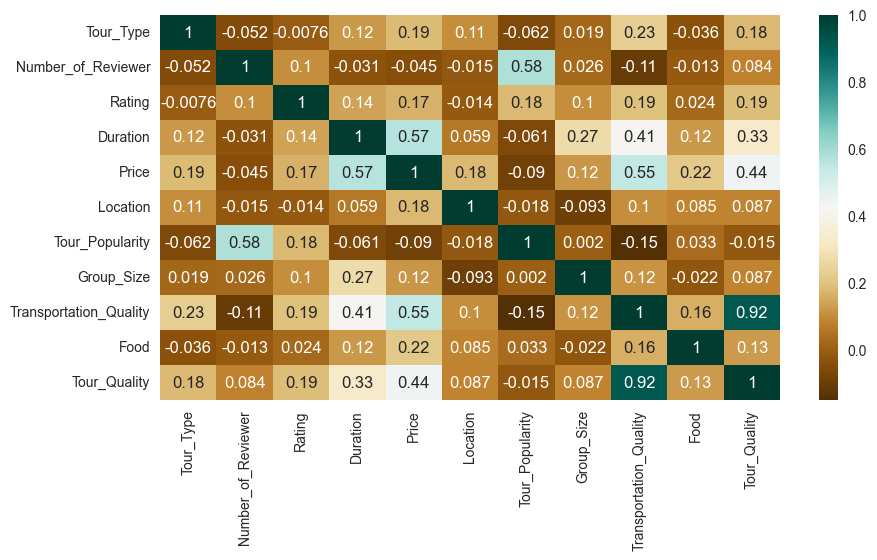

In [107]:
plt.figure(figsize=(10,5))                        
c= df_target.corr()                               
sns.heatmap(c,cmap="BrBG",annot=True);              

# 4. Model Development

<h1 style="color:green;">4.1. Data Spliting</h1>

In [135]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_target.drop('Price', axis=1)
y = df_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the original data and the split data
print("Original Data Shape:", df_target.shape)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

Original Data Shape: (3128, 11)
X_train Shape: (2189, 10)
X_test Shape: (939, 10)
y_train Shape: (2189,)
y_test Shape: (939,)


<h1 style="color:green;">4.2. Simple Linear Regression</h1>

**In this section, we built a simple linear regression of each slection feature**

## Build Model

#### <font color = green|><b>a.) Simple Linear Regression Model

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def print_score(regressor, X_train, y_train, X_test, y_test, train=True):
    if train:
        y_train_pred = regressor.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        
        print("Train Result:\n================================================")
        print(f"Mean Squared Error: {mse_train:.2f}")
        print(f"R-squared: {r2_train:.2f}")
        print("_______________________________________________")
        
    else:
        y_test_pred = regressor.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        print("Test Result:\n================================================")
        print(f"Mean Squared Error: {mse_test:.2f}")
        print(f"R-squared: {r2_test:.2f}")
        print("_______________________________________________")

# Create a LinearRegression model
lr_clf = LinearRegression()

# Fit the model on the training data
lr_clf.fit(X_train, y_train)

# Evaluate and print the scores
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 26202.22
R-squared: 0.47
_______________________________________________
Test Result:
Mean Squared Error: 30037.01
R-squared: 0.50
_______________________________________________


In [137]:
import statsmodels.api as sm

# Create a LinearRegression model
lr_clf = LinearRegression()

# Fit the model on the training data
lr_clf.fit(X_train, y_train)

# Add a constant column to the X_train dataset
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_const)
ols_result = ols_model.fit()

# Print the regression statistics table
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          8.75e-289
Time:                        22:31:11   Log-Likelihood:                -14241.
No. Observations:                2189   AIC:                         2.850e+04
Df Residuals:                    2178   BIC:                         2.857e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -45

                  Feature  Importance Score
7  Transportation_Quality        232.534395
9            Tour_Quality         67.500856
8                    Food         44.077211
6              Group_Size         14.835474
2                  Rating         14.351040
5         Tour_Popularity          6.906045
3                Duration          2.092644
4                Location          0.655028
1      Number_of_Reviewer          0.331425
0               Tour_Type          0.211540


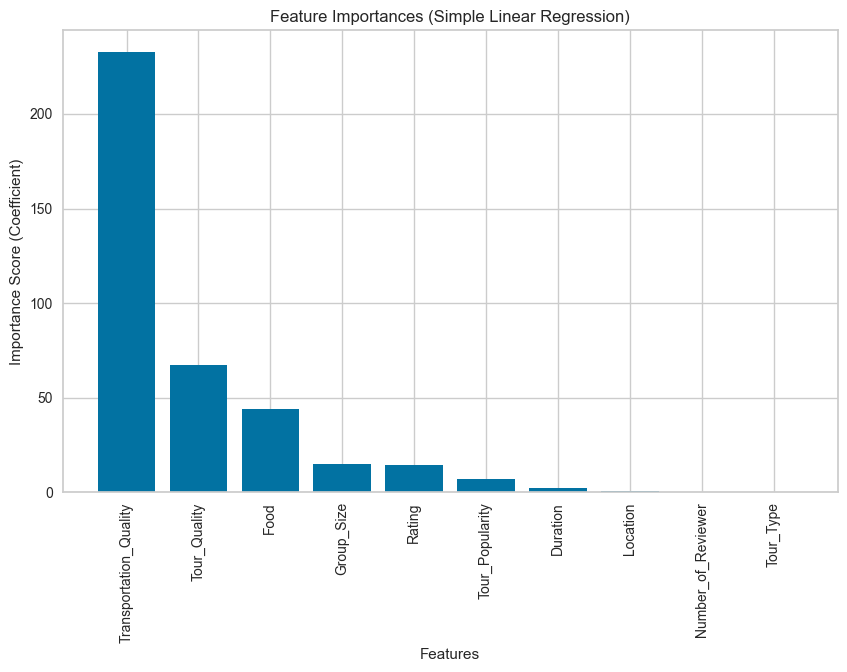

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X, y, X_train, X_test, y_train, y_test from previous code

# Create Simple Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = regressor.coef_

# Create a DataFrame to store feature importances and their scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance Score': np.abs(feature_importances)})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)

# Print the DataFrame with feature importances and scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance Score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score (Coefficient)')
plt.title('Feature Importances (Simple Linear Regression)')
plt.show()


##### `Features Vs Price using Simple Linear Regression`

In [139]:
import statsmodels.api as sm

# Select the desired feature for the regression
for column in X_train.columns:
    print(f'{column} Vs Price \n')
    selected_feature = X_train[column]

    # Add a constant column to the selected feature
    X_train_with_const = sm.add_constant(selected_feature)

    # Fit the OLS (Ordinary Least Squares) model
    ols_model = sm.OLS(y_train, X_train_with_const)
    ols_result = ols_model.fit()

    # Print the regression statistics table
    print(ols_result.summary())
    print('__________________________________________________________________________________________________ \n\n')

Tour_Type Vs Price 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           4.38e-20
Time:                        22:31:43   Log-Likelihood:                -14887.
No. Observations:                2189   AIC:                         2.978e+04
Df Residuals:                    2187   BIC:                         2.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0207     15.92

##### `Predict Price by using Duration`

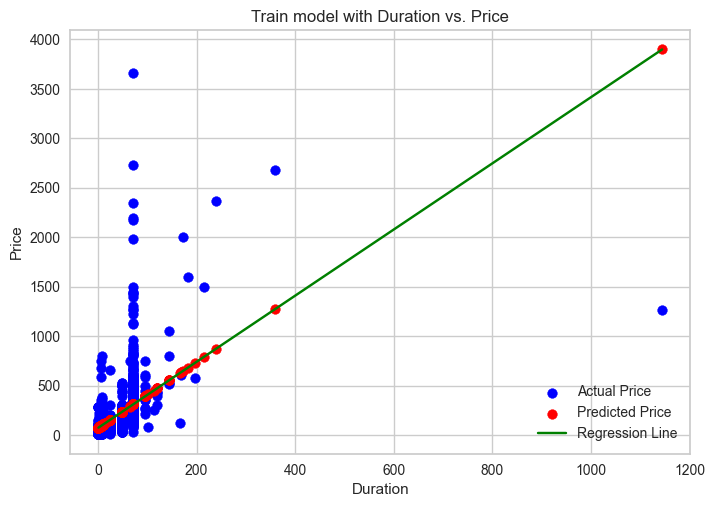

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Add a constant column to the 'Duration' feature
X_train_with_const = sm.add_constant(X_train['Duration'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_train_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_train['Duration'], y_pred, 1)
line_x = np.array([X_train['Duration'].min(), X_train['Duration'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_train['Duration'], y_train, color='blue', label='Actual Price')
plt.scatter(X_train['Duration'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Train model with Duration vs. Price')
plt.legend()
plt.show()

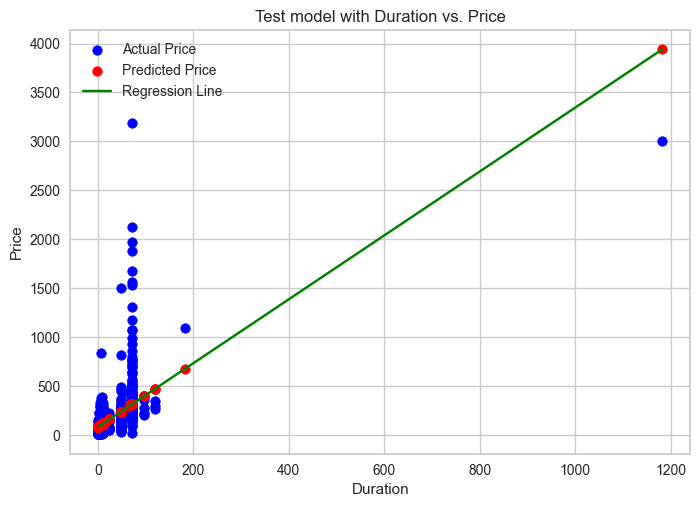

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Add a constant column to the 'Duration' feature
X_test_with_const = sm.add_constant(X_test['Duration'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_test, X_test_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_test_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_test['Duration'], y_pred, 1)
line_x = np.array([X_test['Duration'].min(), X_test['Duration'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_test['Duration'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Duration'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Test model with Duration vs. Price')
plt.legend()
plt.show()

##### `Predict Price by using Transportation_Quality`

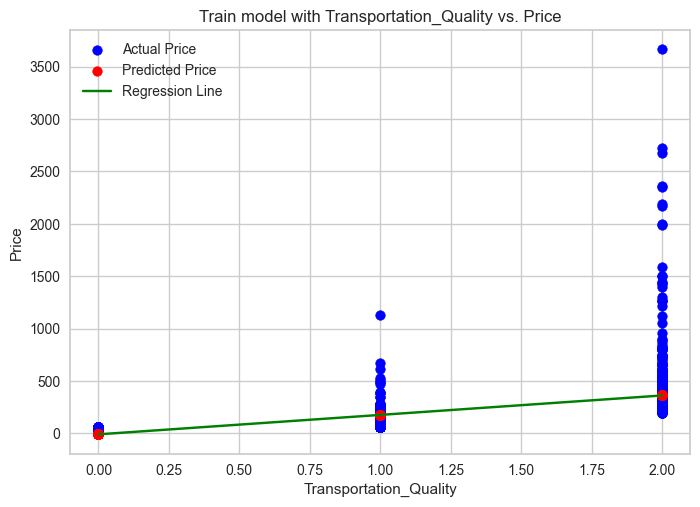

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Add a constant column to the 'Transportation_Quality' feature
X_train_with_const = sm.add_constant(X_train['Transportation_Quality'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_train_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_train['Transportation_Quality'], y_pred, 1)
line_x = np.array([X_train['Transportation_Quality'].min(), X_train['Transportation_Quality'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_train['Transportation_Quality'], y_train, color='blue', label='Actual Price')
plt.scatter(X_train['Transportation_Quality'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Transportation_Quality')
plt.ylabel('Price')
plt.title('Train model with Transportation_Quality vs. Price')
plt.legend()
plt.show()


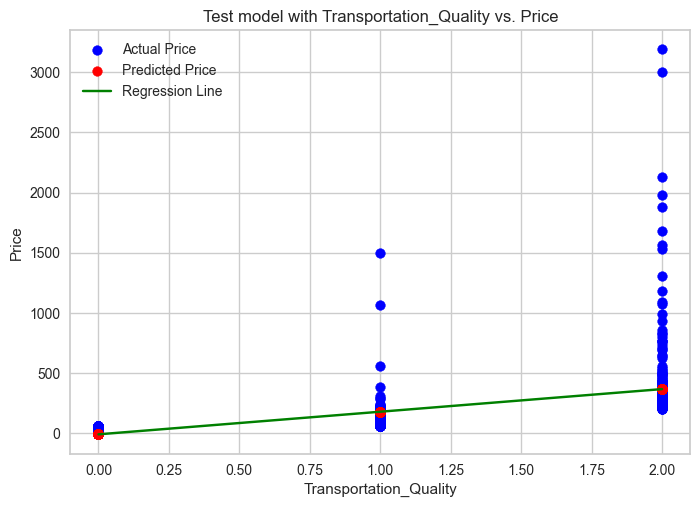

In [143]:
# Add a constant column to the 'Transportation_Quality' feature
X_test_with_const = sm.add_constant(X_test['Transportation_Quality'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_test, X_test_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_test_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_test['Transportation_Quality'], y_pred, 1)
line_x = np.array([X_test['Transportation_Quality'].min(), X_test['Transportation_Quality'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_test['Transportation_Quality'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Transportation_Quality'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Transportation_Quality')
plt.ylabel('Price')
plt.title('Test model with Transportation_Quality vs. Price')
plt.legend()
plt.show()

##### `Predict Price by using `

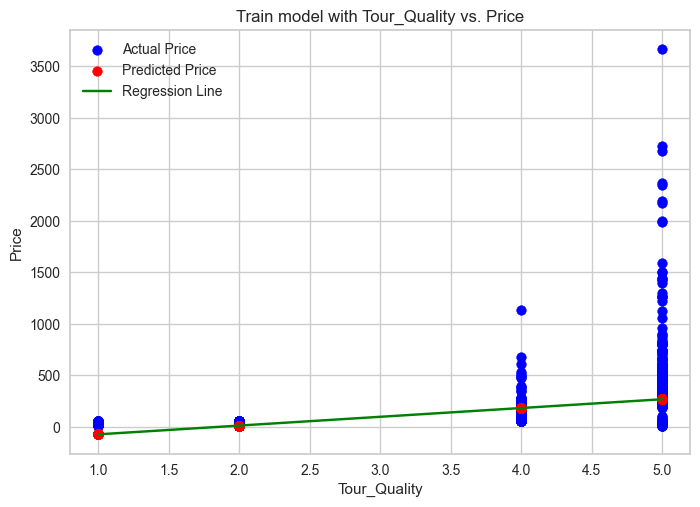

In [144]:
# Add a constant column to the 'Transportation_Quality' feature
X_train_with_const = sm.add_constant(X_train['Tour_Quality'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_train_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_train['Tour_Quality'], y_pred, 1)
line_x = np.array([X_train['Tour_Quality'].min(), X_train['Tour_Quality'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_train['Tour_Quality'], y_train, color='blue', label='Actual Price')
plt.scatter(X_train['Tour_Quality'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Tour_Quality')
plt.ylabel('Price')
plt.title('Train model with Tour_Quality vs. Price')
plt.legend()
plt.show()     

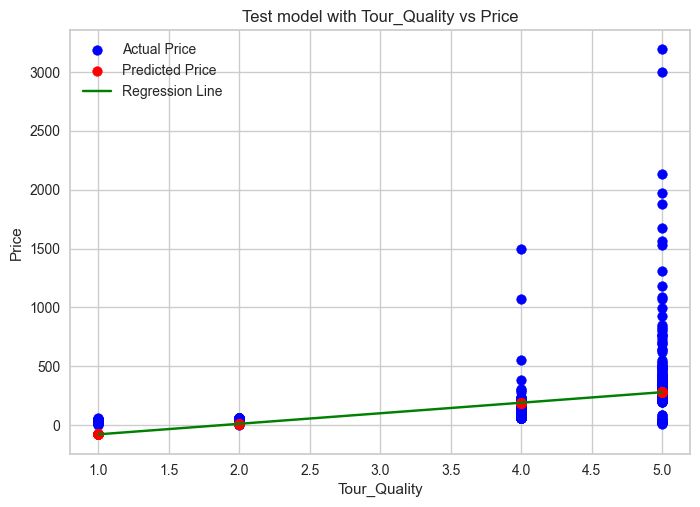

In [145]:
# Add a constant column to the 'Transportation_Quality' feature
X_test_with_const = sm.add_constant(X_test['Tour_Quality'])

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_test, X_test_with_const)
ols_result = ols_model.fit()

# Make predictions using the trained model
y_pred = ols_result.predict(X_test_with_const)

# Calculate the regression line
regression_line = np.polyfit(X_test['Tour_Quality'], y_pred, 1)
line_x = np.array([X_test['Tour_Quality'].min(), X_test['Tour_Quality'].max()])
line_y = regression_line[0] * line_x + regression_line[1]

# Plot the scatter plot and regression line
plt.scatter(X_test['Tour_Quality'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Tour_Quality'], y_pred, color='red', label='Predicted Price')
plt.plot(line_x, line_y, color='green', label='Regression Line')
plt.xlabel('Tour_Quality')
plt.ylabel('Price')
plt.title('Test model with Tour_Quality vs Price')
plt.legend()
plt.show()     

In [146]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def build_model1(X, y):
    num_features = X.shape[1]
    
    for i in range(num_features):
        feature = X.iloc[:, i]  # Accessing feature column by index
        feature_name = X.columns[i]  # Extracting feature name
        
        feature = sm.add_constant(feature)  # Adding the constant
        lm = sm.OLS(y, feature).fit()  # Fitting the model
        
        # Model Summary
        print(f"Summary for {feature_name}:")
        print(lm.summary())
        
        # Predicting the values
        y_pred = lm.predict(feature)
        
        # Plotting the actual vs. predicted values with linear line
        plt.scatter(y, y_pred)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Linear line
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs. Predicted Values ({feature_name})')
        
        # Adjusting y and x ranges
        plt.ylim(0, 1000)
        plt.xlim(0, 1000)
        
        plt.show()
        
        # Calculating R-squared
        r_squared = lm.rsquared
        print(f"R-squared for {feature_name}: {r_squared}")
        
        # Calculating Mean Squared Error (MSE)
        mse = mean_squared_error(y, y_pred)
        print(f"Mean Squared Error (MSE) for {feature_name}: {mse}\n")


## Model Evaluation

In [147]:
import pandas as pd
import statsmodels.api as sm
from IPython.display import display

def build_model1(X, y):
    num_features = X.shape[1]
    n = len(y)  # Number of observations
    
    results = []  # List to store feature names, R-squared, adjusted R-squared, and RMSE
    
    for i in range(num_features):
        feature = X.iloc[:, i]  # Accessing feature column by index
        feature_name = X.columns[i]  # Extracting feature name
        
        feature = sm.add_constant(feature)  # Adding the constant
        lm = sm.OLS(y, feature).fit()  # Fitting the model
        
        # Calculating R-squared
        r_squared = lm.rsquared
        
        # Calculating adjusted R-squared
        df_residuals = n - (i + 1)  # Degrees of freedom of the residuals
        adj_r_squared = 1 - (1 - r_squared) * (n - 1) / df_residuals
        
        # Predicting the values
        y_pred = lm.predict(feature)
        
        # Calculating RMSE
        rmse = np.sqrt(np.mean((y - y_pred)**2))
        
        # Store feature name, R-squared, adjusted R-squared, and RMSE in results list
        results.append({'Feature': feature_name, 'R-squared': r_squared, 'Adjusted R-squared': adj_r_squared, 'RMSE': rmse})
        
    # Create DataFrame from results list
    results_df = pd.DataFrame(results)
    
    return results_df

# Split the dataset into features (X) and target variable (y)
X = df_target.drop('Price', axis=1)
y = df_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results_df = build_model1(X_train, y_train)
display(results_df)


,Feature,R-squared,Adjusted R-squared,RMSE
0,Tour_Type,0.037795,0.037795,217.470292
1,Number_of_Reviewer,0.001838,0.001381,221.496462
2,Rating,0.028145,0.027256,218.558133
3,Duration,0.297701,0.296737,185.792058
4,Location,0.034614,0.032846,217.829455
5,Tour_Popularity,0.007816,0.005543,220.832162
6,Group_Size,0.013415,0.010702,220.208235
7,Transportation_Quality,0.309635,0.307420,184.206707
8,Food,0.043174,0.039662,216.861653
9,Tour_Quality,0.200447,0.197145,198.239330


In [148]:
results_df = build_model1(X_test, y_test)
display(results_df)

,Feature,R-squared,Adjusted R-squared,RMSE
0,Tour_Type,0.028622,0.028622,242.583238
1,Number_of_Reviewer,0.002630,0.001566,245.807281
2,Rating,0.026136,0.024055,242.893409
3,Duration,0.360965,0.358915,196.756420
4,Location,0.029880,0.025725,242.426114
5,Tour_Popularity,0.009227,0.003917,244.993054
6,Group_Size,0.014257,0.007911,244.370355
7,Transportation_Quality,0.280916,0.275509,208.716372
8,Food,0.059205,0.051112,238.733963
9,Tour_Quality,0.187845,0.179977,221.812555


**Base on the summary table, we found out that:**
* Predictor Variable **'Duration'(R-squared: 0.423)**, **'Transportation_Quality'(R-squared: 0.296)** and **'Tour_Quality'(R-squared:0.189)** have the highest R square. 
* Thes 3 predictors variable also have low RMSE compare to others  

**We can asume that these three variable have the most impact on Tour Price Prediction model**

<h1 style="color:green;">4.3. Multiple Linear Regression</h1>

**In this section, we built a multiple linear regression of our slection feature**

## Build Model

In [149]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def build_model(X, y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y, X).fit() # Fitting the model
    
    # Model Summary
    print(lm.summary())
    
    # Predicting the values
    y_pred = lm.predict(X)
    
    # Plotting the actual vs. predicted values with linear line
    plt.scatter(y, y_pred)
    plt.plot([0, 2000], [0, 2000], color='red', linestyle='--')  # Linear line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    
    # Adjusting y and x ranges
    plt.ylim(-100, 2000)
    plt.xlim(-100, 2000)
    
    plt.show()
    
    # Calculating Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          8.75e-289
Time:                        22:31:57   Log-Likelihood:                -14241.
No. Observations:                2189   AIC:                         2.850e+04
Df Residuals:                    2178   BIC:                         2.857e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -45

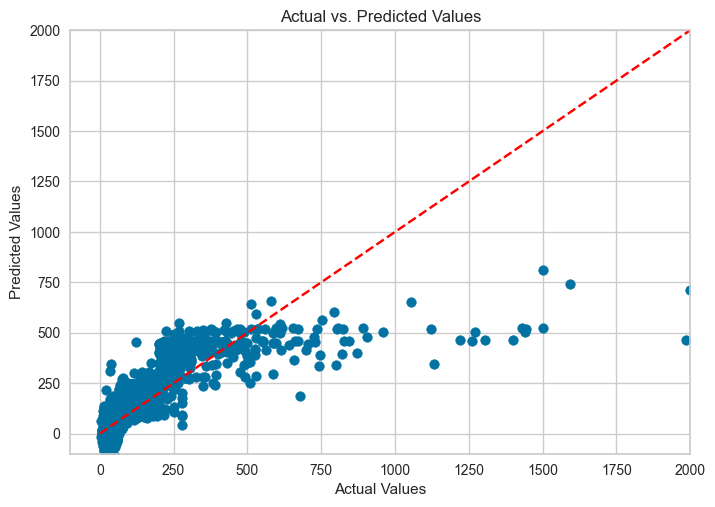

Mean Squared Error (MSE): 26202.219834909836


In [150]:
build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     97.28
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          4.51e-137
Time:                        22:32:00   Log-Likelihood:                -6165.8
No. Observations:                 939   AIC:                         1.235e+04
Df Residuals:                     928   BIC:                         1.241e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -69

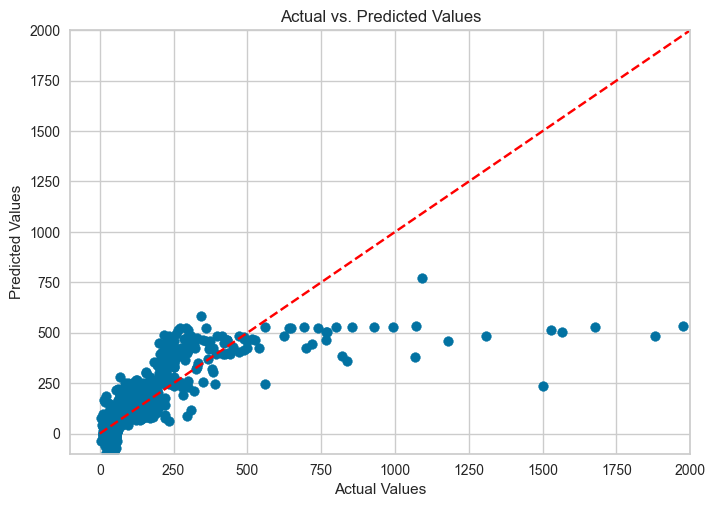

Mean Squared Error (MSE): 29576.9010032222


In [151]:
build_model(X_test,y_test)

## Model Evaluation

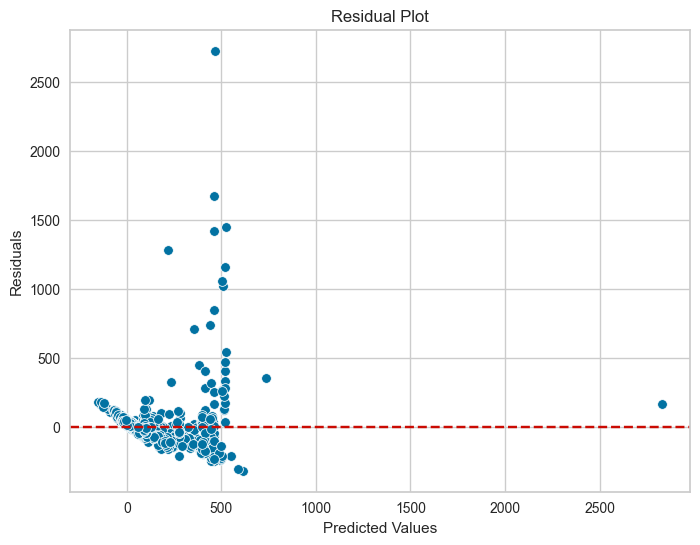

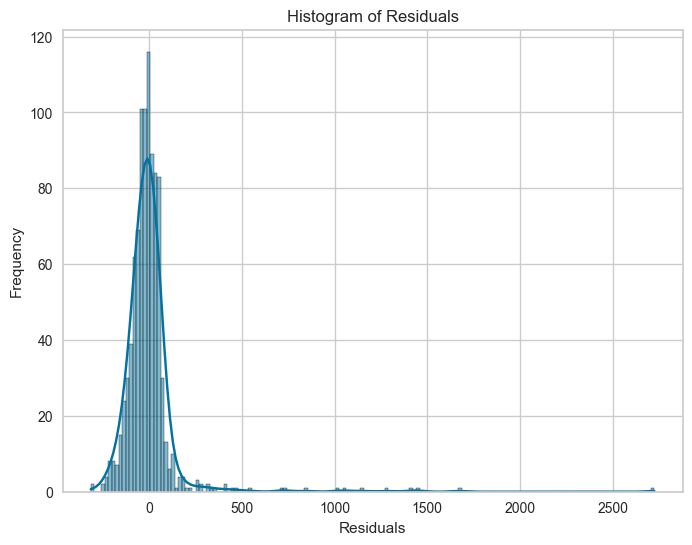

Mean Squared Error (MSE): 30037.005621518052


In [152]:
# model diagnostics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset and split it into features and target variables
X = df_target.drop(["Price"], axis=1)  # Your feature data
y = df_target['Price']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Residuals (difference between predicted and actual values)
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Cross-Validation MSE scores: [34124.1542459  25588.76187308 22949.12933812 28466.13745133
 32123.76894109]
Mean MSE: 28650.39036990538
Standard Deviation of MSE: 4097.275807460453


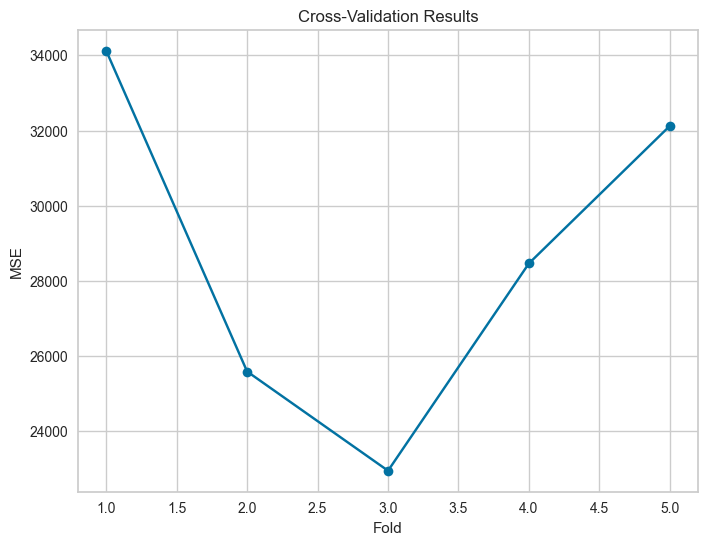

In [153]:
# model Evaluate
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Load your dataset and split it into features and target variables
X = df_target.drop(["Price"], axis=1)  # Your feature data
y = df_target['Price']  # Your target variable

# Create your Multiple Linear Regression model
model = LinearRegression()

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE scores to positive

# Print the evaluation results
print("Cross-Validation MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))
# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_folds + 1), mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Cross-Validation Results')
plt.grid(True)
plt.show() 

<h1 style="color:green;">4.4. Polynomial Regression</h1>

## Build Polynomial model with degree 2

R-squared score for feature Tour_Type : 0.02655666174344362


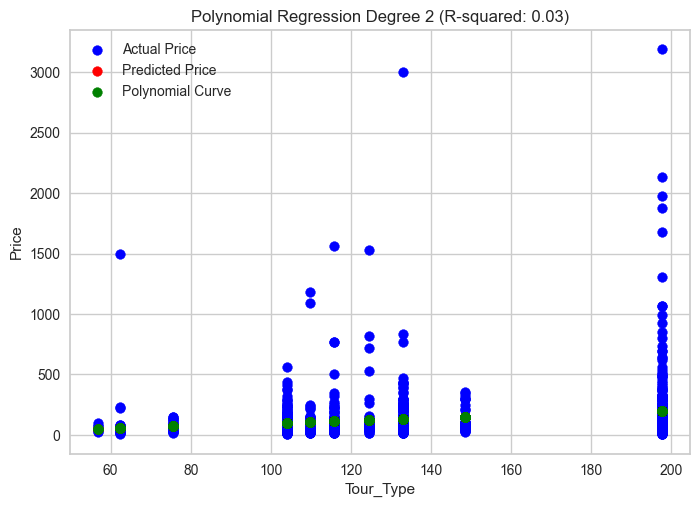

R-squared score for feature Number_of_Reviewer : 0.0019727866153040896


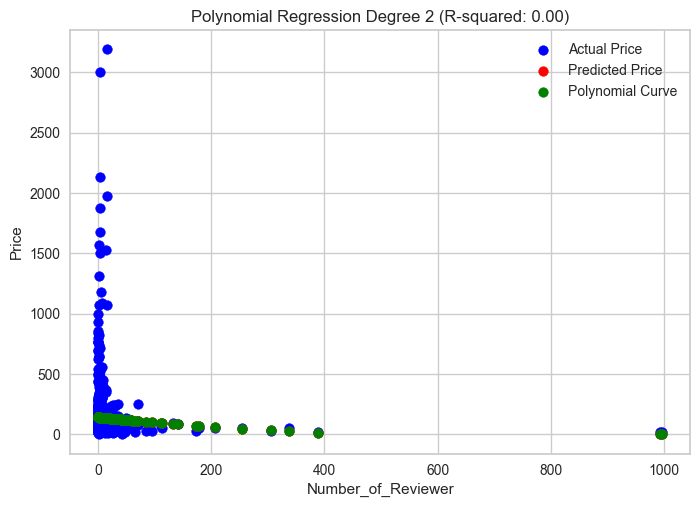

R-squared score for feature Rating : 0.025511187116938228


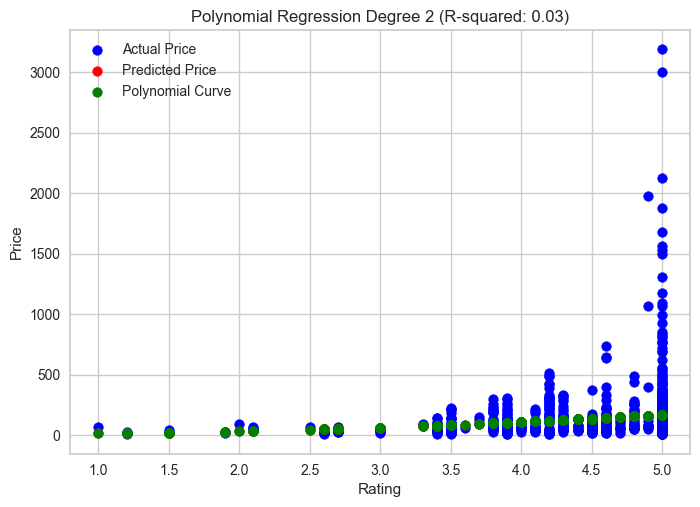

R-squared score for feature Duration : 0.36021940702261


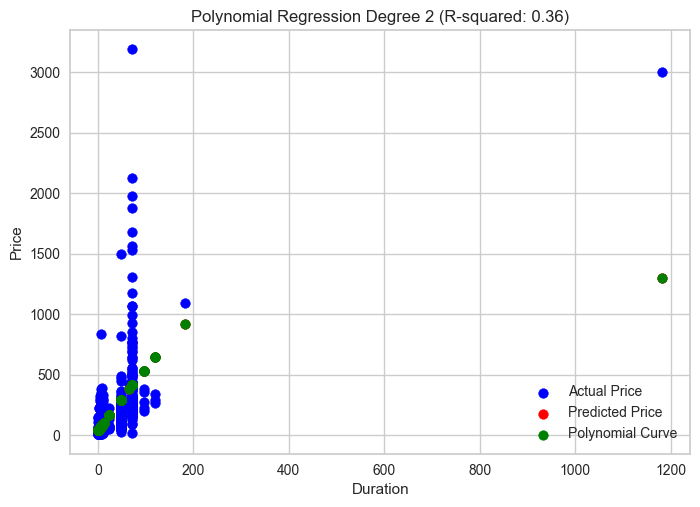

R-squared score for feature Location : 0.018465605672479346


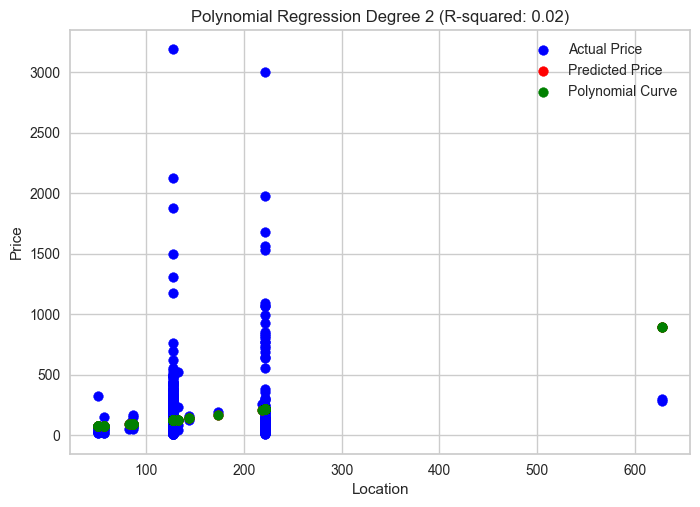

R-squared score for feature Tour_Popularity : 0.006852327880567555


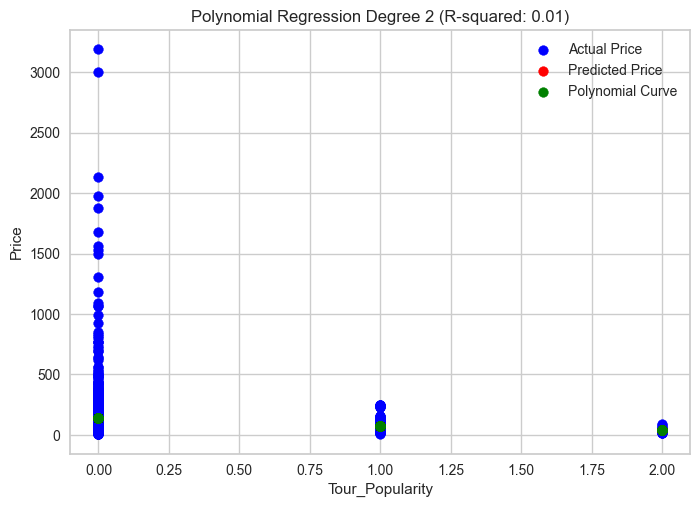

R-squared score for feature Group_Size : 0.012052572097147385


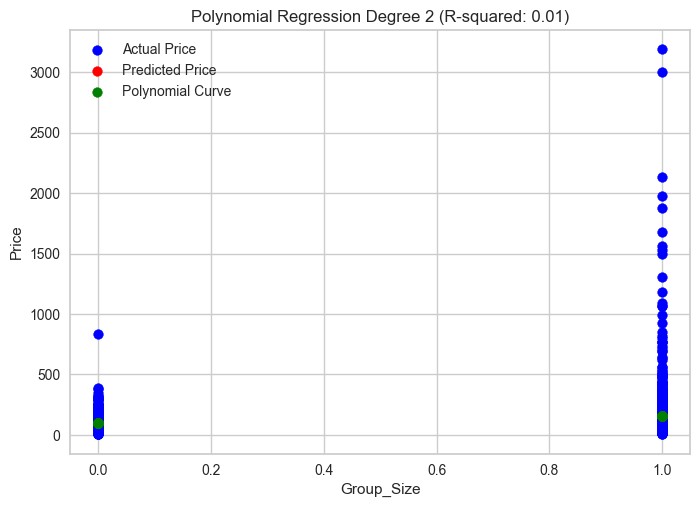

R-squared score for feature Transportation_Quality : 0.34873203526645613


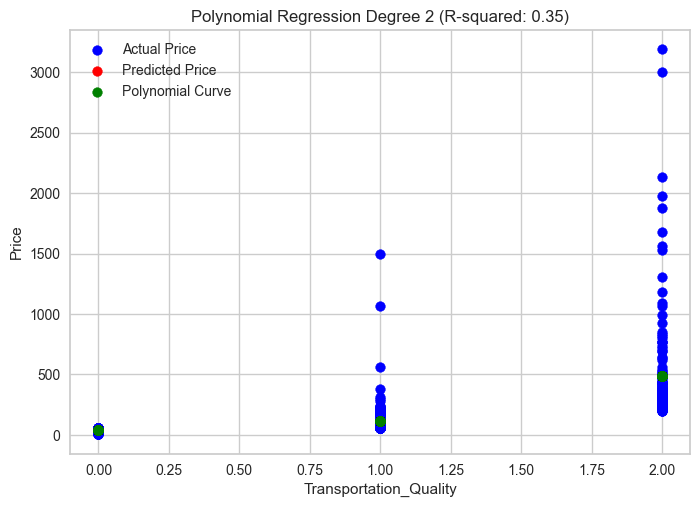

R-squared score for feature Food : 0.0544762182834706


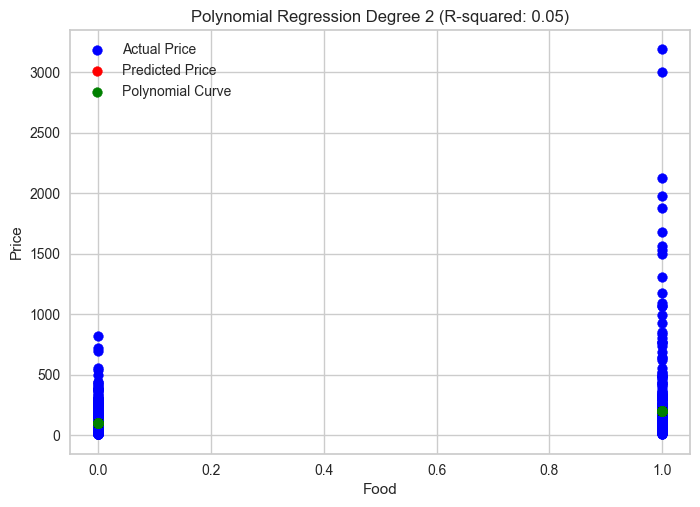

R-squared score for feature Tour_Quality : 0.2921970443443693


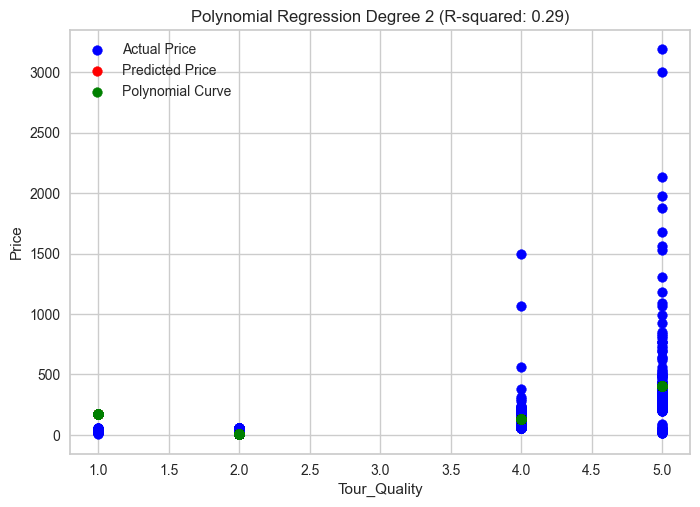

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Your data
X = df_target.drop('Price', axis=1)
y = df_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)

# Plotting the polynomial of predicted price and actual price for each feature
for feature in X.columns:
    # Transform the data for the current feature
    x_train_trans = poly.fit_transform(X_train[[feature]])
    x_test_trans = poly.transform(X_test[[feature]])

    # Include bias parameter
    lr = LinearRegression()
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score for feature", feature, ":", r2)

    # Plotting the polynomial curve
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted Price')

    # Sort the values for a smoother curve
    sorted_indices = X_test[feature].argsort(axis=0)
    X_test_sorted = X_test[feature].iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.scatter(X_test_sorted, y_pred_sorted, color='green', label='Polynomial Curve')

    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title('Polynomial Regression Degree 2 (R-squared: {:.2f})'.format(r2))
    plt.legend()
    plt.show()


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from IPython.display import display

# Your data
X = df_target.drop('Price', axis=1)
y = df_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)

results = []  # List to store feature names, R-squared, adjusted R-squared, and RMSE

# Calculate R-squared, adjusted R-squared, and RMSE for each feature
for feature in X.columns:
    # Transform the data for the current feature
    x_train_trans = poly.fit_transform(X_train[[feature]])
    x_test_trans = poly.transform(X_test[[feature]])

    # Include bias parameter
    lr = LinearRegression()
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate adjusted R-squared score
    n = len(y_test)
    p = x_test_trans.shape[1] - 1
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store feature name, R-squared, adjusted R-squared, and RMSE in results list
    results.append({'Feature': feature, 'R-squared': r2, 'Adjusted R-squared': adj_r2, 'RMSE': rmse})

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
display(results_df)

,Feature,R-squared,Adjusted R-squared,RMSE
0,Tour_Type,0.026557,0.024477,242.840970
1,Number_of_Reviewer,0.001973,-0.000160,245.888270
2,Rating,0.025511,0.023429,242.971340
3,Duration,0.360219,0.358852,196.871183
4,Location,0.018466,0.016368,243.848103
5,Tour_Popularity,0.006852,0.004730,245.286437
6,Group_Size,0.012053,0.009942,244.643419
7,Transportation_Quality,0.348732,0.347340,198.630748
8,Food,0.054476,0.052456,239.333145
9,Tour_Quality,0.292197,0.290685,207.072681


In [77]:
import pandas as pd                                                                              
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Get the names of the polynomial features
poly_feature_names = poly_features.get_feature_names(X_train.columns)

# Fit a linear regression model on polynomial features
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)

# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

# Get coefficients
coefficients = regressor.coef_

# Create a DataFrame for the regression table
regression_table = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# Print the regression table
print(regression_table)

                                Feature  Coefficient
0                             Tour_Type     0.430613
1                    Number_of_Reviewer   -21.664013
2                                Rating   163.532668
3                              Duration    -1.784109
4                              Location    -0.670986
..                                  ...          ...
60          Transportation_Quality Food    33.378273
61  Transportation_Quality Tour_Quality  -182.030444
62                               Food^2    -7.784460
63                    Food Tour_Quality   -30.698562
64                       Tour_Quality^2    56.682128

[65 rows x 2 columns]


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Build Polynomial model with degree 3

R-squared score for feature Tour_Type : 0.026451598063949033


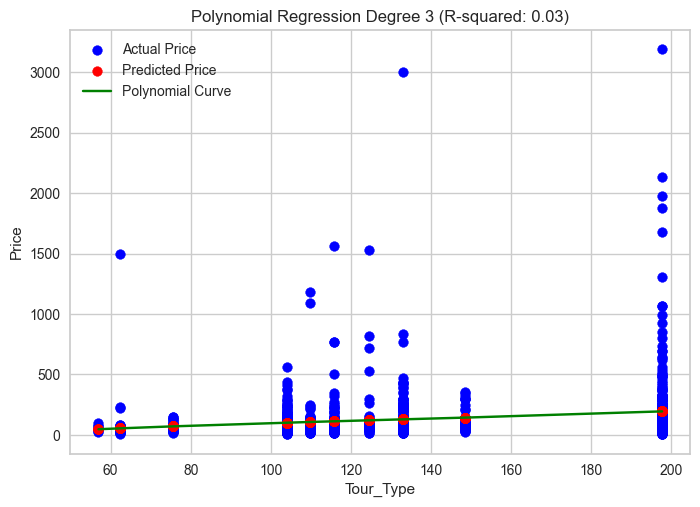

R-squared score for feature Number_of_Reviewer : 0.002203751682439359


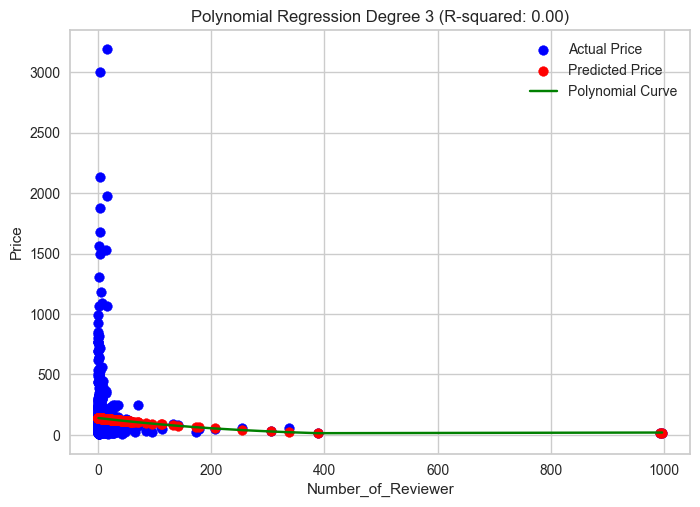

R-squared score for feature Rating : 0.025950657829243662


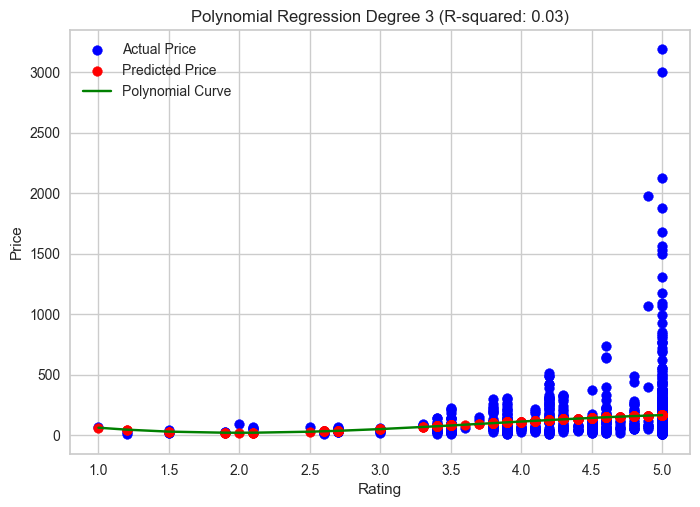

R-squared score for feature Duration : 0.2761606092370159


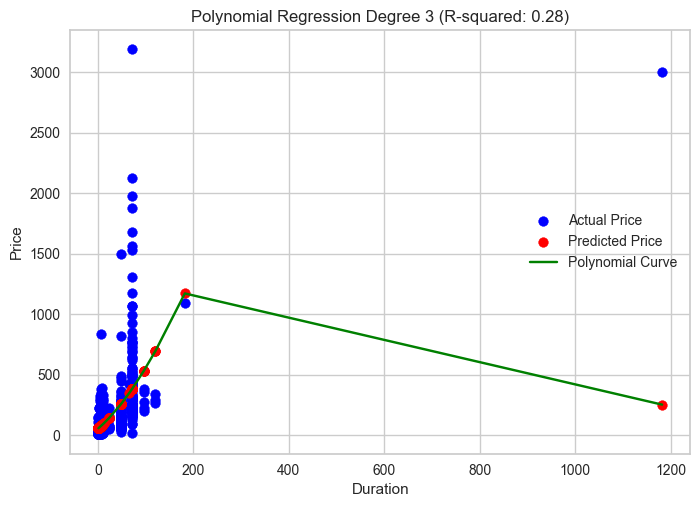

R-squared score for feature Location : 0.015580692138578156


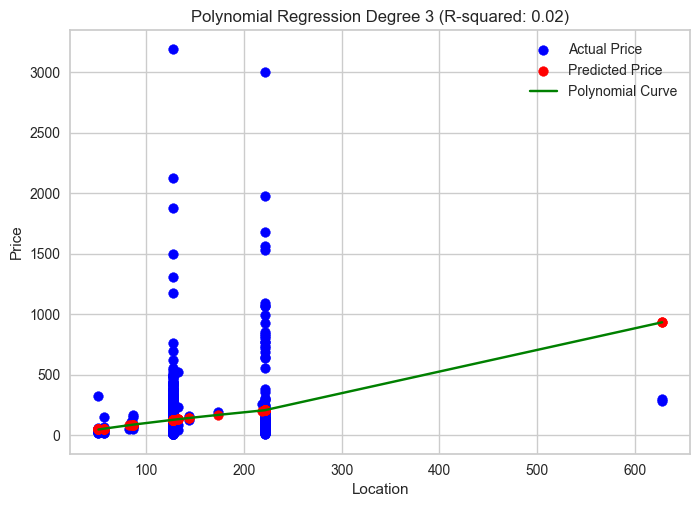

R-squared score for feature Tour_Popularity : 0.006874926727613029


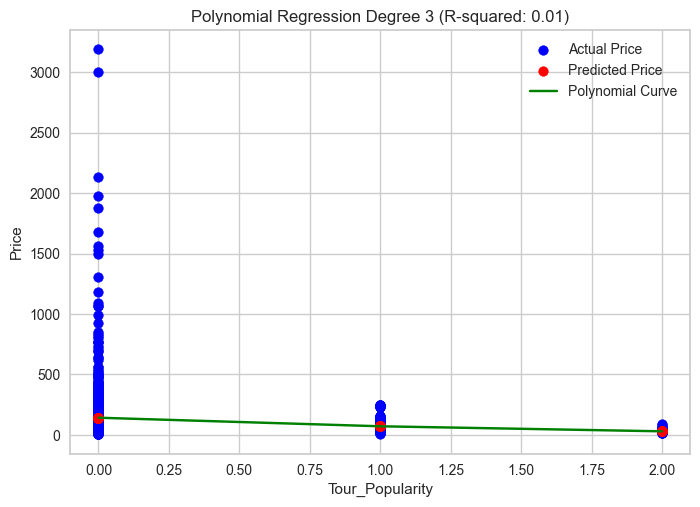

R-squared score for feature Group_Size : 0.012128466308003572


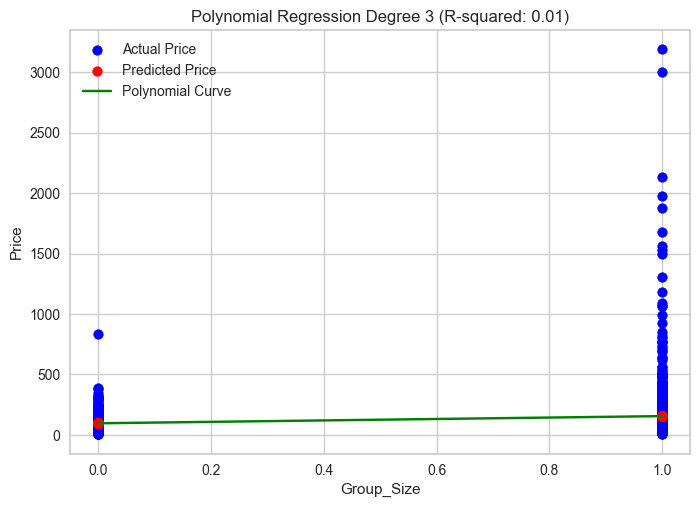

R-squared score for feature Transportation_Quality : 0.3485964673462708


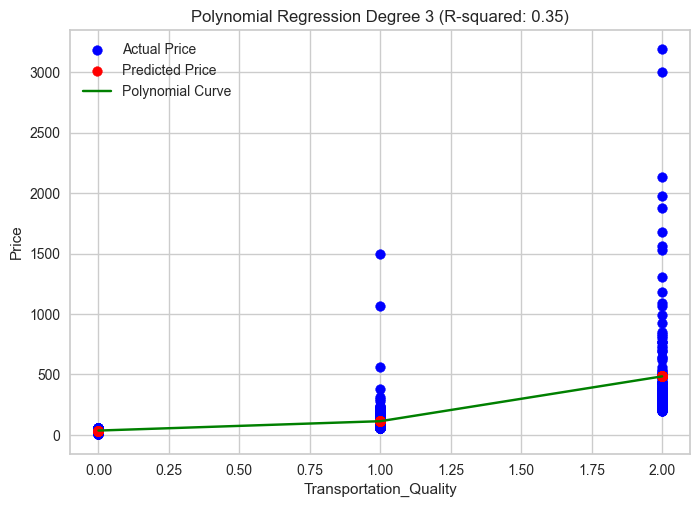

R-squared score for feature Food : 0.05446147048151584


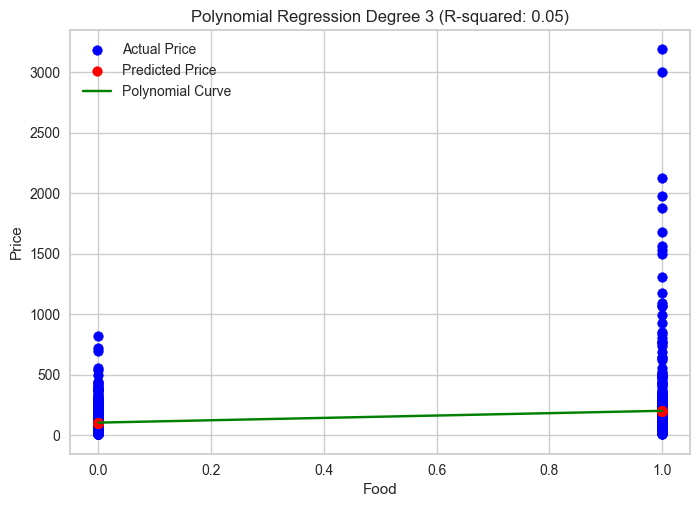

R-squared score for feature Tour_Quality : 0.3087646857348002


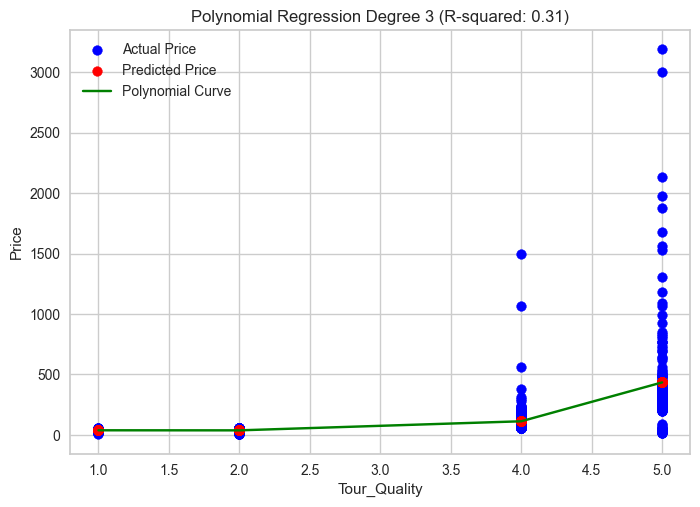

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = df_target.drop('Price', axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying polynomial regression degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)

# Plotting the polynomial of predicted price and actual price for each feature
for feature in X.columns:
    # Transform the data for the current feature
    x_train_trans = poly.fit_transform(X_train[[feature]])
    x_test_trans = poly.transform(X_test[[feature]])

    # Include bias parameter
    lr = LinearRegression()
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score for feature", feature, ":", r2)

    # Plotting the polynomial curve
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted Price')

    # Sort the values for a smoother curve
    sorted_indices = X_test[feature].argsort(axis=0)
    X_test_sorted = X_test[feature].iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Polynomial Curve')

    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title('Polynomial Regression Degree 3 (R-squared: {:.2f})'.format(r2))
    plt.legend()
    plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from IPython.display import display

# Your data
X = df_target.drop('Price', axis=1)
y = df_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying polynomial regression degree 2
poly = PolynomialFeatures(degree=3, include_bias=True)

results = []  # List to store feature names, R-squared, adjusted R-squared, and RMSE

# Calculate R-squared, adjusted R-squared, and RMSE for each feature
for feature in X.columns:
    # Transform the data for the current feature
    x_train_trans = poly.fit_transform(X_train[[feature]])
    x_test_trans = poly.transform(X_test[[feature]])

    # Include bias parameter
    lr = LinearRegression()
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate adjusted R-squared score
    n = len(y_test)
    p = x_test_trans.shape[1] - 1
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store feature name, R-squared, adjusted R-squared, and RMSE in results list
    results.append({'Feature': feature, 'R-squared': r2, 'Adjusted R-squared': adj_r2, 'RMSE': rmse})

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
display(results_df)

,Feature,R-squared,Adjusted R-squared,RMSE
0,Tour_Type,0.026452,0.023328,242.854074
1,Number_of_Reviewer,0.002204,-0.000998,245.859817
2,Rating,0.025951,0.022825,242.916547
3,Duration,0.276161,0.273838,209.405328
4,Location,0.015581,0.012422,244.206198
5,Tour_Popularity,0.006875,0.003688,245.283646
6,Group_Size,0.012128,0.008959,244.634022
7,Transportation_Quality,0.348596,0.346506,198.651420
8,Food,0.054461,0.051428,239.335012
9,Tour_Quality,0.308765,0.306547,204.634841


## Build Mutiple Polynomial model with degree 2

R-squared score: -434326225.43389064


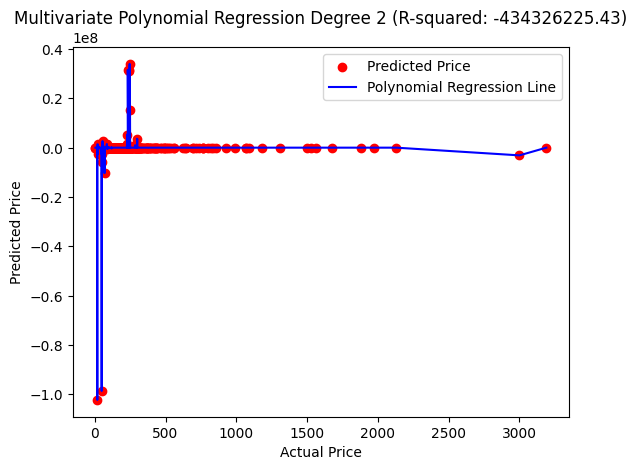

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = df_target.drop('Price', axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying polynomial regression degree 2
poly = PolynomialFeatures(degree=4, include_bias=True)

# Transform the data
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

# Include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Plotting the scatter plot of predicted price and actual price
plt.scatter(y_test, y_pred, color='red', label='Predicted Price')

# Plotting the polynomial regression line
sorted_indexes = np.argsort(y_test)
plt.plot(y_test.iloc[sorted_indexes], y_pred[sorted_indexes], color='blue', label='Polynomial Regression Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multivariate Polynomial Regression Degree 2 (R-squared: {:.2f})'.format(r2))
plt.legend()
plt.show()


<h1 style="color:green;">4.5. Lasso Regression</h1>

## Build Lasso Model

In [83]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = df_target.drop(["Price"], axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_score(regressors, X_train, y_train, X_test, y_test):
    for i, regressor in enumerate(regressors):
        if i == 0:
            print("Train Result:\n================================================")
        else:
            print("\nTest Result:\n================================================")
        
        regressor.fit(X_train, y_train)
        
        y_train_pred = regressor.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        
        print(f"Model {i+1}:")
        print(f"Mean Squared Error (Train): {mse_train:.2f}")
        print(f"R-squared (Train): {r2_train:.2f}")
        
        y_test_pred = regressor.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        print(f"Mean Squared Error (Test): {mse_test:.2f}")
        print(f"R-squared (Test): {r2_test:.2f}")
        print("_______________________________________________")

# Create Lasso regression models with different regularization strengths
alpha_values = [0.1,0.5,1.0]
regressors = [Lasso(alpha=alpha) for alpha in alpha_values]

# Evaluate and print the scores for all models
print_score(regressors, X_train, y_train, X_test, y_test)

Train Result:
Model 1:
Mean Squared Error (Train): 26202.91
R-squared (Train): 0.47
Mean Squared Error (Test): 30037.61
R-squared (Test): 0.50
_______________________________________________

Test Result:
Model 2:
Mean Squared Error (Train): 26219.36
R-squared (Train): 0.47
Mean Squared Error (Test): 30053.97
R-squared (Test): 0.50
_______________________________________________

Test Result:
Model 3:
Mean Squared Error (Train): 26264.59
R-squared (Train): 0.47
Mean Squared Error (Test): 30071.19
R-squared (Test): 0.50
_______________________________________________


## Model Evaluation

      Actual Value  Predicted Value
2753       104.772        79.083678
2545        35.000        32.472323
178         15.000       -10.895938
1502        91.290       127.226805
2727        99.000       100.908744
...            ...              ...
2827        95.000       108.224120
2057       273.850       389.196691
742         85.000       206.902662
2869        58.130        54.005661
1869       115.390       232.969398

[939 rows x 2 columns]


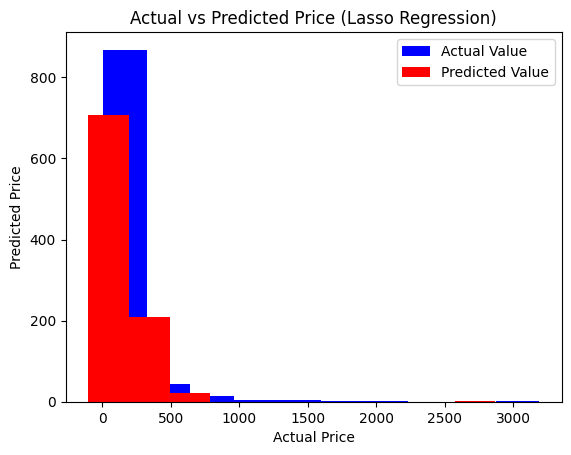

Mean Squared Error: 30071.18771295136
R-squared: 0.5036164946998059


In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create Lasso regression model
lasso = Lasso(alpha=1.0)

# Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict the Price for the test data
y_pred = lasso.predict(X_test)

data = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
print(data)

# Plot scatterplot of actual vs predicted values with different colors
plt.hist(y_test, color='b', label='Actual Value')
plt.hist(y_pred, color='r', label='Predicted Value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Lasso Regression)')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

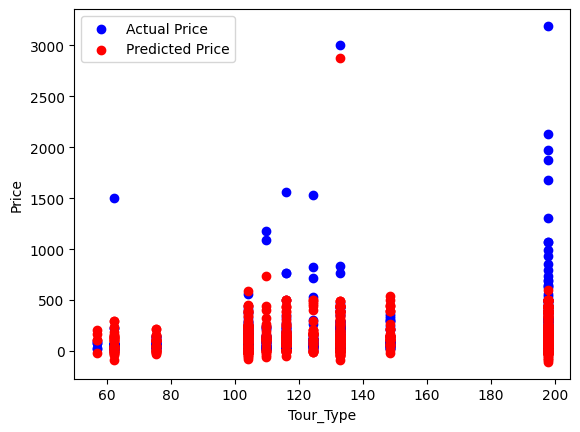

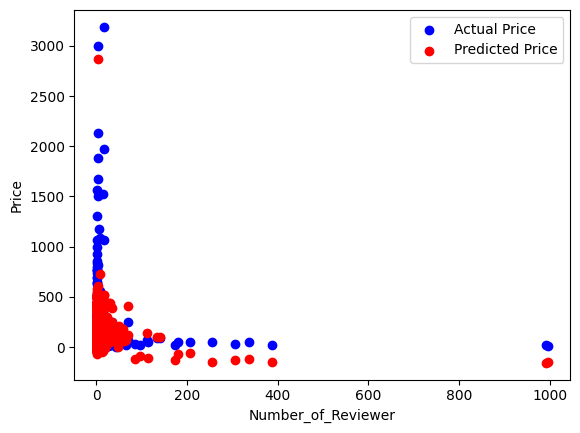

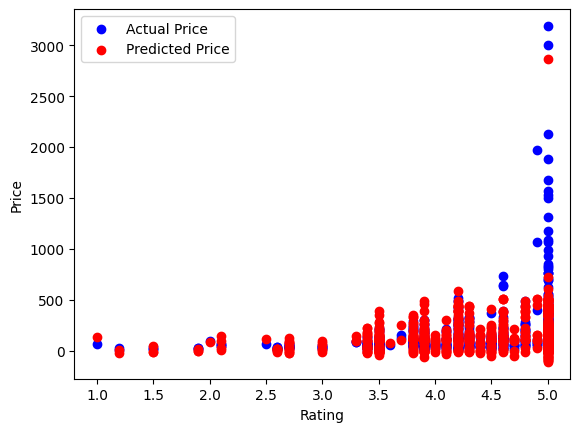

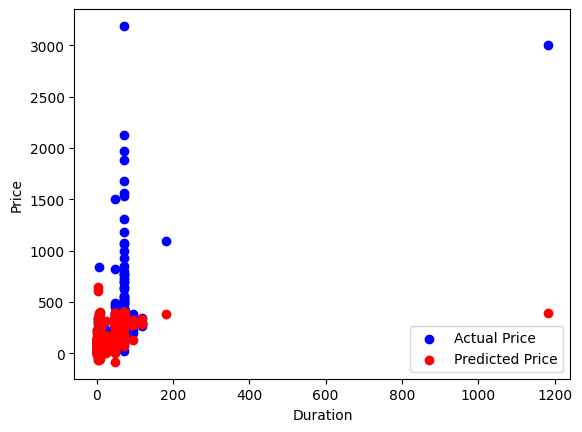

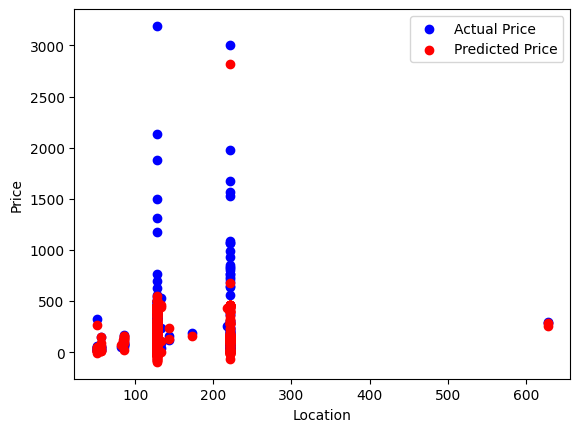

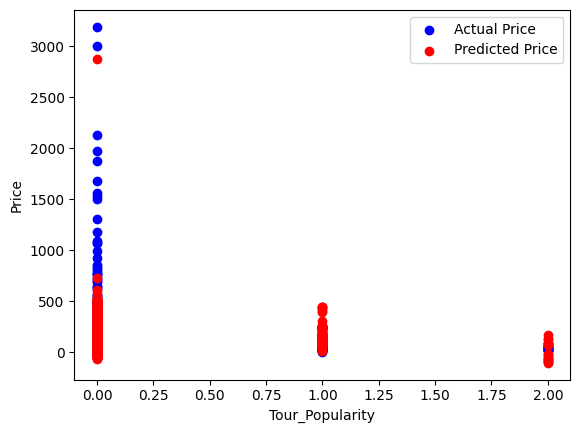

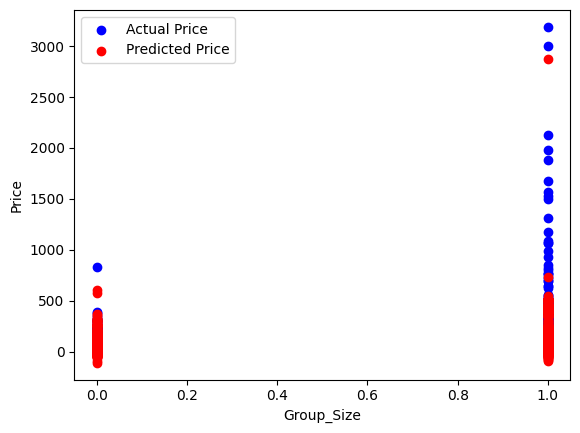

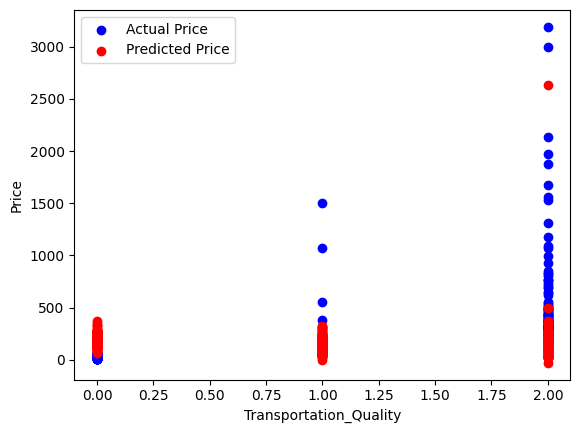

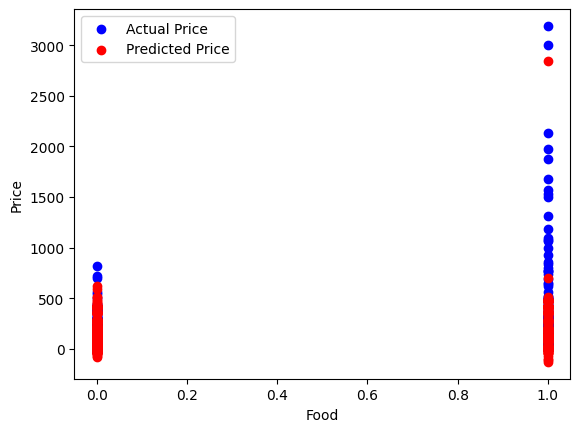

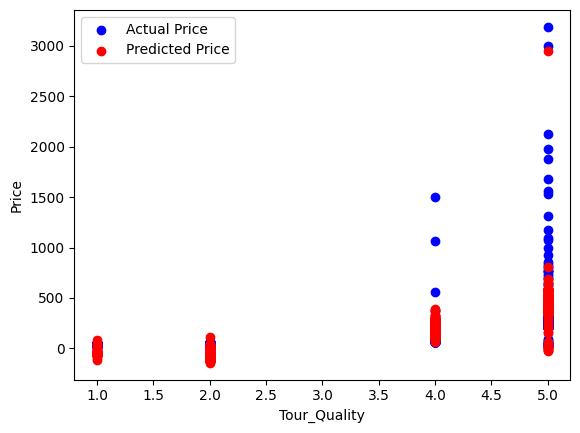

In [85]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create Lasso regression model
lasso = Lasso(alpha=1.0)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Get the feature names
feature_names = X_train.columns

# Plot the graph for each feature
for feature in feature_names:
    # Create a copy of the test data with the current feature set to a constant value
    X_test_modified = X_test.copy()
    X_test_modified[feature] = X_test[feature].mean()  # Set the feature to the mean value

    # Predict the Price for the modified test data
    y_pred = lasso.predict(X_test_modified)

    # Create a DataFrame for plotting
    results = pd.DataFrame({feature: X_test[feature], 'Actual Price': y_test, 'Predicted Price': y_pred})

    # Sort the DataFrame by the feature for better visualization
    results = results.sort_values(feature)

    # Plot the graph
    plt.scatter(results[feature], results['Actual Price'], color='blue', label='Actual Price')
    plt.scatter(results[feature], results['Predicted Price'], color='red', label='Predicted Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

                  Feature  Importance Score
7  Transportation_Quality        202.365593
9            Tour_Quality         51.009637
8                    Food         40.869880
2                  Rating         12.296550
6              Group_Size          9.005025
3                Duration          2.137282
4                Location          0.668010
1      Number_of_Reviewer          0.236417
0               Tour_Type          0.224656
5         Tour_Popularity          0.000000


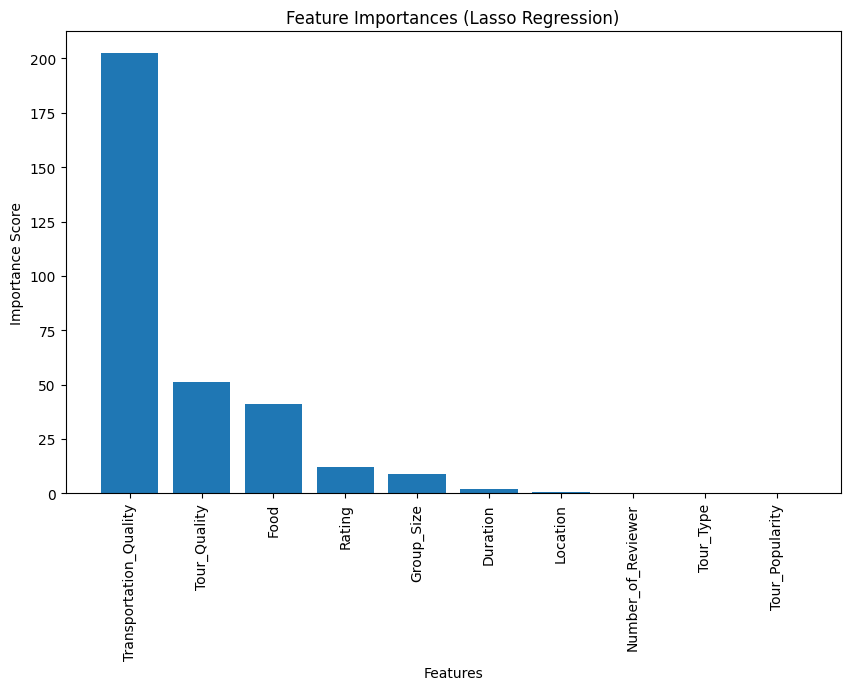

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X, y, X_train, X_test, y_train, y_test from previous code

# Create Lasso regression model
lasso = Lasso(alpha=1.0)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = lasso.coef_

# Create a DataFrame to store feature importances and their scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance Score': np.abs(feature_importances)})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)

# Print the DataFrame with feature importances and scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance Score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances (Lasso Regression)')
plt.show()


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X, y, X_train, X_test, y_train, y_test from previous code

# Create an empty DataFrame to store evaluation metrics for each feature
evaluation_df = pd.DataFrame(columns=['Feature', 'R2 Score', 'Adjusted R2 Score', 'MSE'])

# Loop through each feature
for feature in X_train.columns:
    # Create a new DataFrame with only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Create a new Lasso regression model
    lasso = Lasso(alpha=1.0)
    
    # Fit the model on the training data
    lasso.fit(X_train_feature, y_train)
    
    # Make predictions on the test set
    y_test_pred = lasso.predict(X_test_feature)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate adjusted R-squared
    n = len(y_test)
    p = 1  # Since we have only one feature in X_train_feature
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Append the evaluation metrics to the DataFrame
    evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)

# Print the DataFrame with evaluation metrics for each feature
print(evaluation_df)


                  Feature  R2 Score  Adjusted R2 Score           MSE
0               Tour_Type  0.026575           0.025536  58970.641081
1      Number_of_Reviewer  0.000546          -0.000521  60547.474965
2                  Rating  0.024619           0.023578  59089.100606
3                Duration  0.359383           0.358699  38808.955705
4                Location  0.028725           0.027689  58840.371488
5         Tour_Popularity  0.006399           0.005339  60192.896050
6              Group_Size  0.011674           0.010620  59873.319582
7  Transportation_Quality  0.280722           0.279954  43574.276677
8                    Food  0.053345           0.052335  57348.862795
9            Tour_Quality  0.186826           0.185958  49262.523645


C:\Users\LH\AppData\Local\Temp\ipykernel_10504\2316484956.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)
C:\Users\LH\AppData\Local\Temp\ipykernel_10504\2316484956.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)
C:\Users\LH\AppData\Local\Temp\ipykernel_10504\2316484956.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse},

# <b><font color = 'green'>4.6. Random Forest

## Build Model

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train MSE: 4402.980735242763
Train R2 Score: 0.9104193178194213
Test MSE: 22276.732604837398
Test R2 Score: 0.6322791529693446


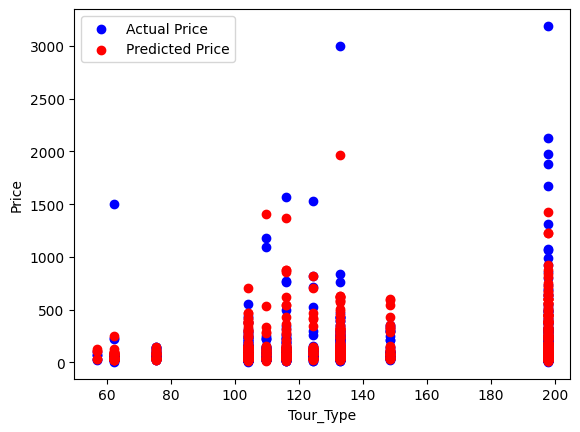

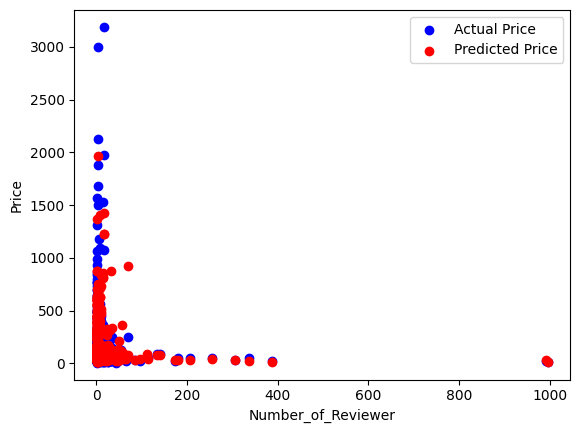

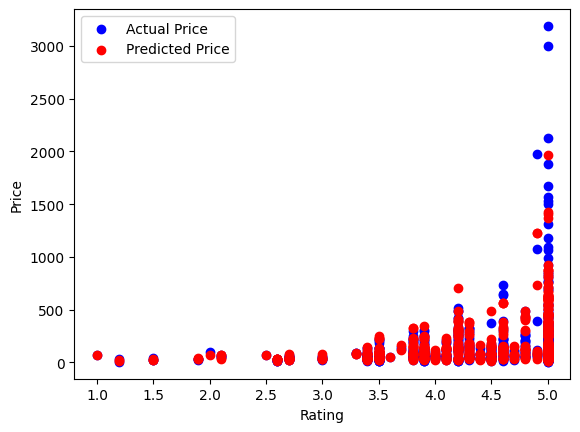

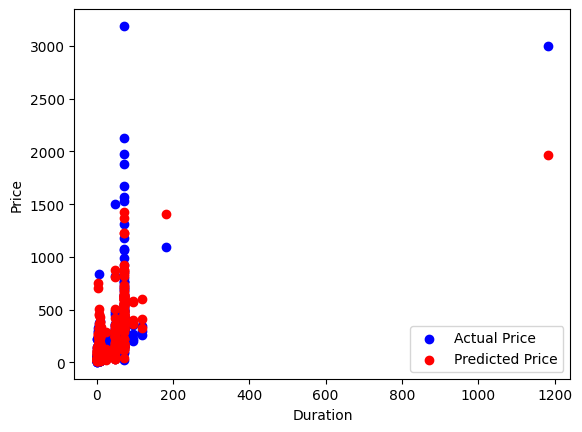

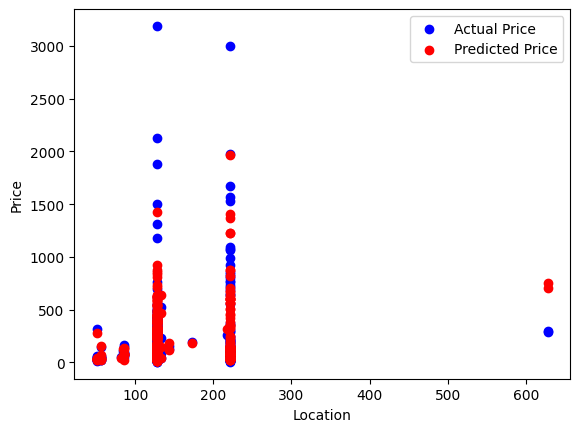

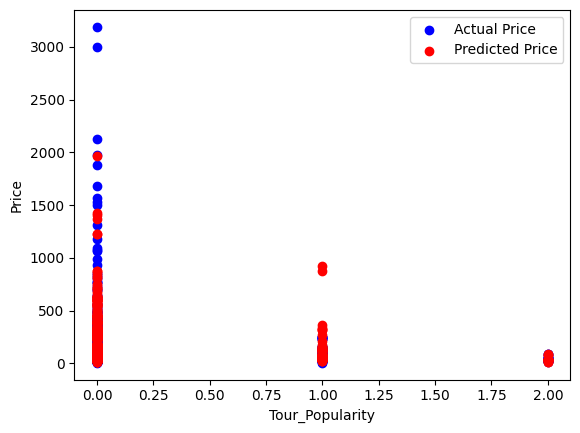

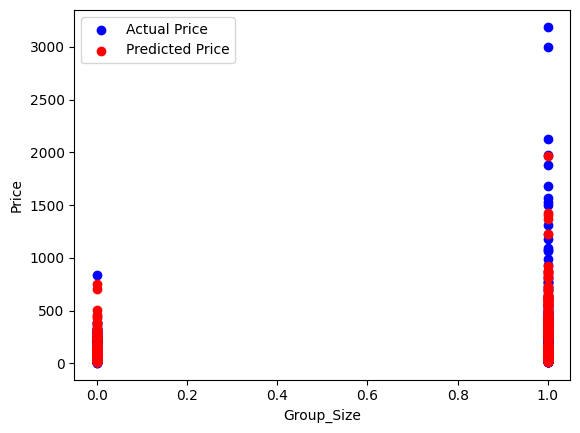

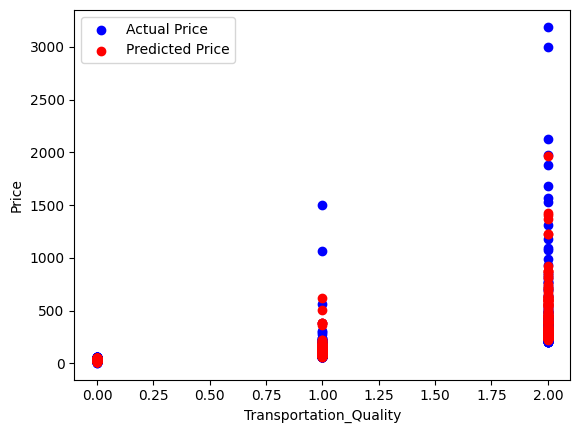

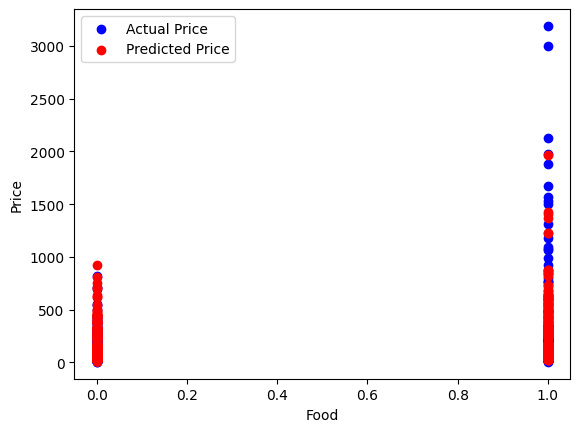

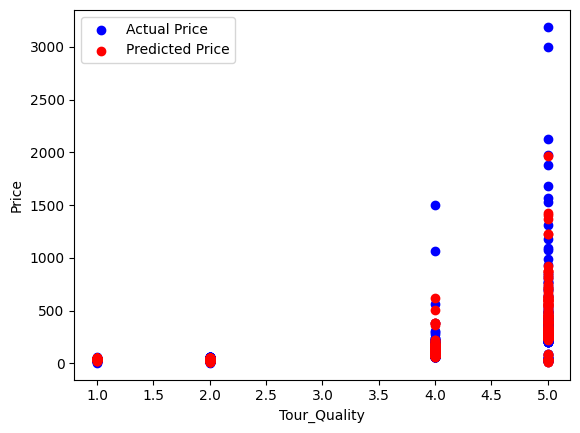

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_target.drop(["Price"], axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=None)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = regressor.predict(X_test)

# Evaluate the model
y_train_pred = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train MSE:', mse_train)
print('Train R2 Score:', r2_train)
print('Test MSE:', mse_test)
print('Test R2 Score:', r2_test)

# Create a DataFrame for plotting
results = pd.DataFrame(X_test, columns=X_test.columns)
results['Actual Price'] = y_test
results['Predicted Price'] = y_test_pred

# Plot Predicted Price vs Actual Price for each feature
for feature in X_train.columns:
    plt.scatter(results[feature], results['Actual Price'], color='blue', label='Actual Price')
    plt.scatter(results[feature], results['Predicted Price'], color='red', label='Predicted Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

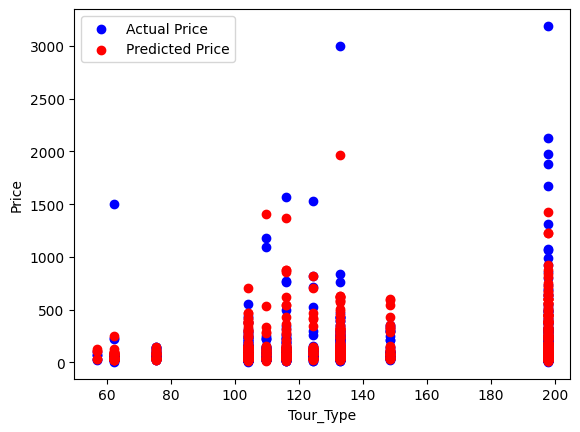

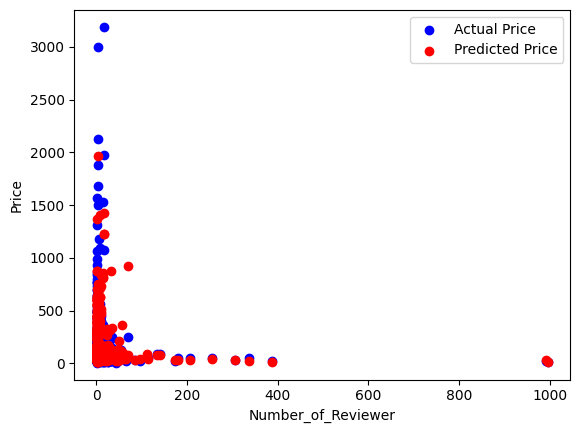

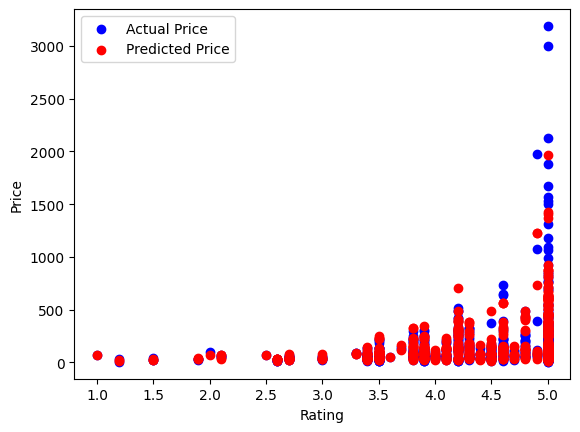

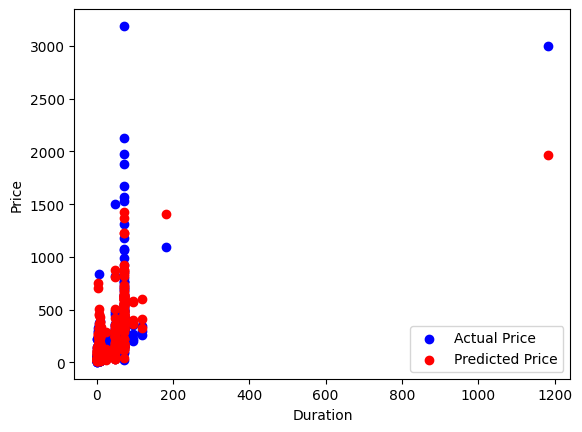

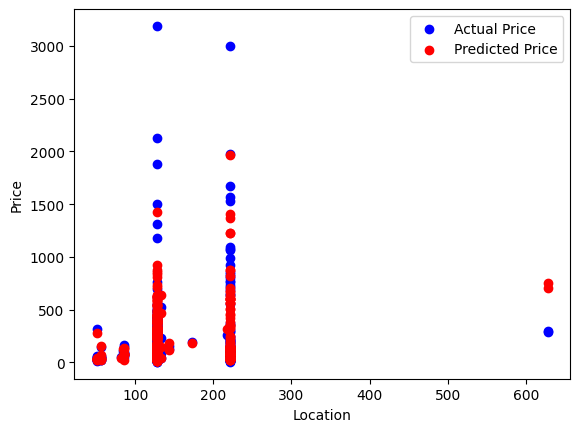

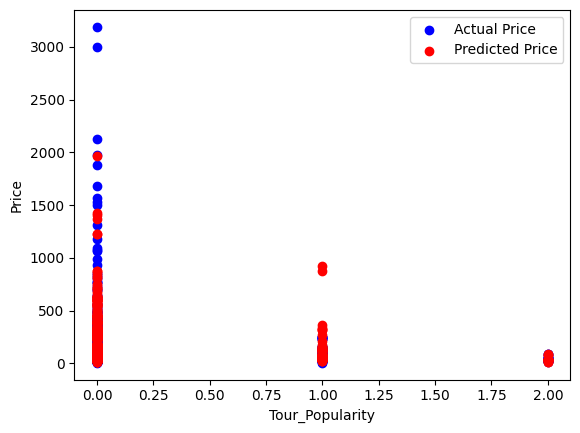

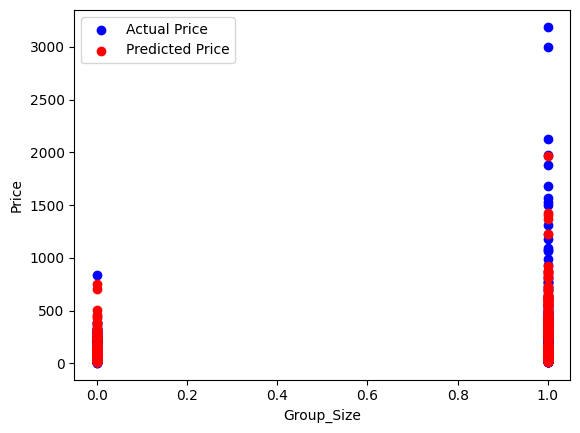

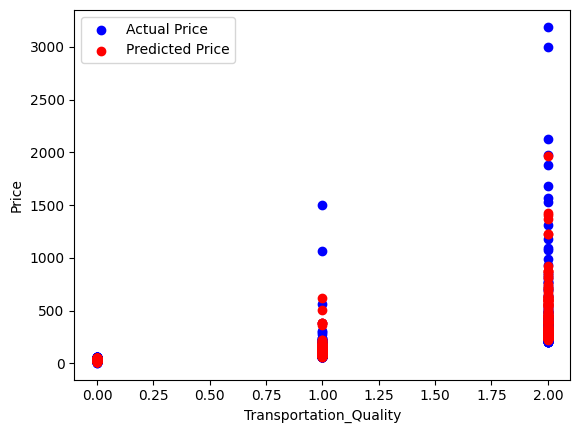

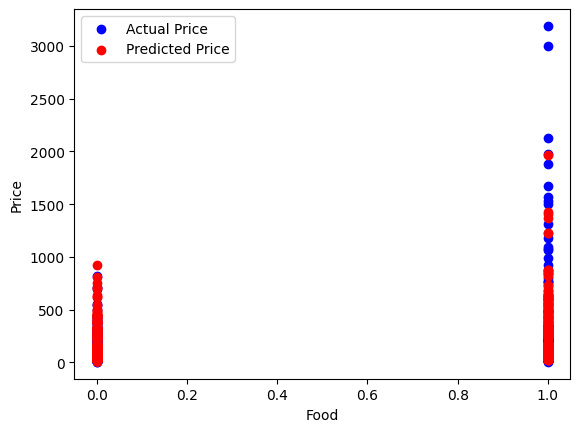

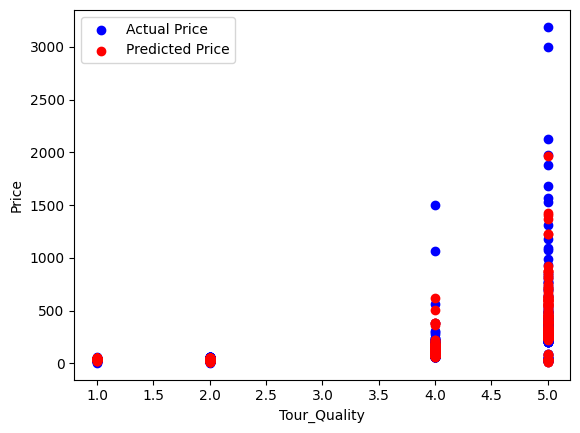

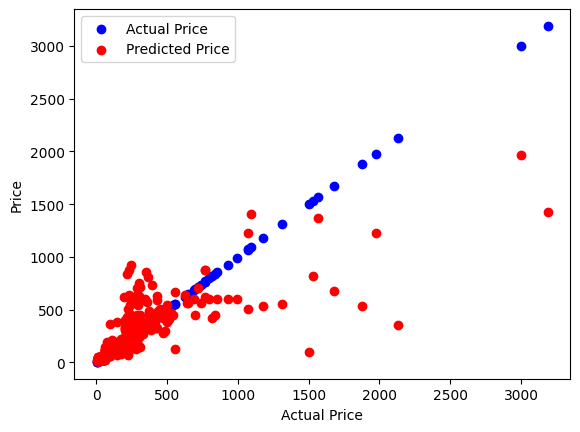

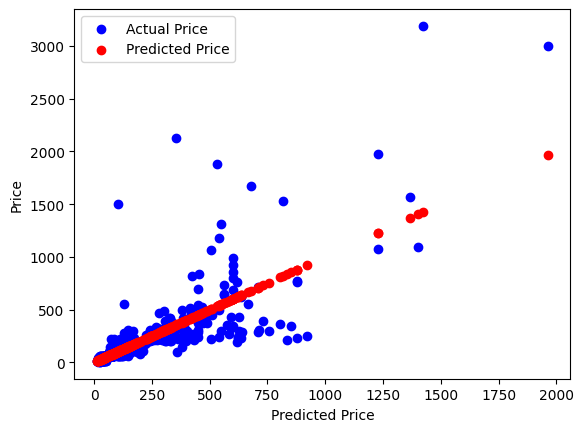

In [32]:
for feature in X_test.columns:
    plt.scatter(results[feature], results['Actual Price'], color='blue', label='Actual Price')
    plt.scatter(results[feature], results['Predicted Price'], color='red', label='Predicted Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


                  Feature  Importance
7  Transportation_Quality    0.439925
1      Number_of_Reviewer    0.211766
3                Duration    0.163614
0               Tour_Type    0.067570
4                Location    0.058786
2                  Rating    0.030325
8                    Food    0.022801
6              Group_Size    0.003481
5         Tour_Popularity    0.001676
9            Tour_Quality    0.000056


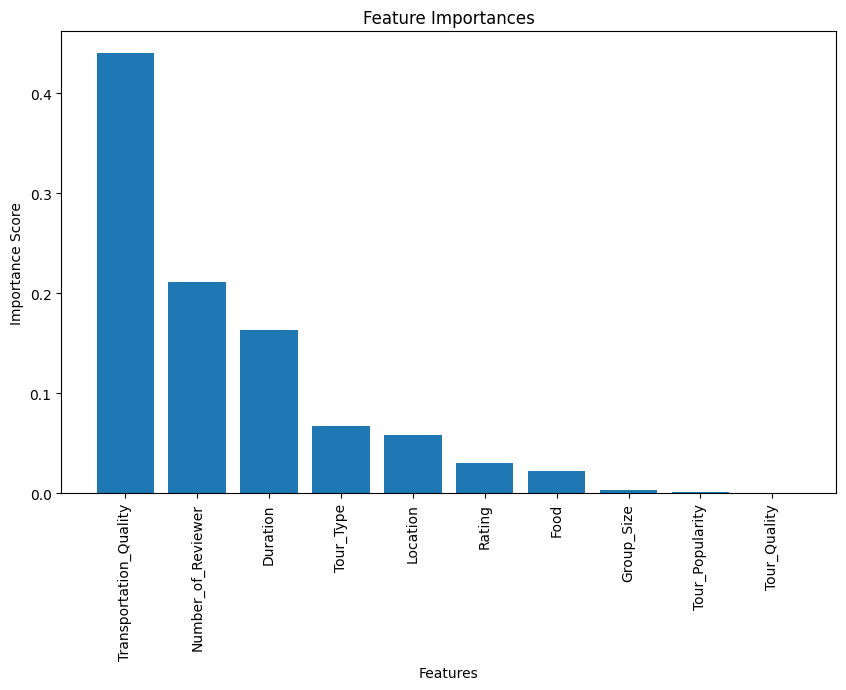

The most effective predictor to the target is: Transportation_Quality


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=None)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get the feature importances
importance_scores = regressor.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame to see the importance scores for each feature
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()

# Mark the most effective predictor
most_effective_predictor = importance_df.iloc[0]['Feature']
print(f"The most effective predictor to the target is: {most_effective_predictor}")

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X, y, X_train, X_test, y_train, y_test from previous code

# Create an empty DataFrame to store evaluation metrics for each feature
evaluation_df = pd.DataFrame(columns=['Feature', 'R2 Score', 'Adjusted R2 Score', 'MSE'])

# Loop through each feature
for feature in X_train.columns:
    # Create a new DataFrame with only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Create a new Random Forest Regressor model
    regressor = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=None)
    
    # Fit the model on the training data
    regressor.fit(X_train_feature, y_train)
    
    # Make predictions on the test set
    y_test_pred = regressor.predict(X_test_feature)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate adjusted R-squared
    n = len(y_test)
    p = 1  # Since we have only one feature in X_train_feature
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Append the evaluation metrics to the DataFrame
    evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)

evaluation_df = evaluation_df.sort_values(by='R2 Score', ascending=False)
print(evaluation_df)

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\LH\AppData\Local\Temp\ipykernel_10504\2212402490.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)
c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it

                  Feature  R2 Score  Adjusted R2 Score           MSE
3                Duration  0.416469           0.415847  35350.603293
7  Transportation_Quality  0.348285           0.347589  39481.284012
9            Tour_Quality  0.308931           0.308193  41865.343406
1      Number_of_Reviewer  0.190618           0.189754  49032.812621
8                    Food  0.054504           0.053495  57278.685981
2                  Rating  0.040808           0.039784  58108.406433
4                Location  0.022776           0.021733  59200.782490
0               Tour_Type  0.021780           0.020736  59261.094341
6              Group_Size  0.012250           0.011196  59838.441856
5         Tour_Popularity  0.006866           0.005806  60164.608008


C:\Users\LH\AppData\Local\Temp\ipykernel_10504\2212402490.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({'Feature': feature, 'R2 Score': r2, 'Adjusted R2 Score': adjusted_r2, 'MSE': mse}, ignore_index=True)


<h1 style="color:green;">4.6. Linear Support Vector Regression</h1>

In [88]:
from sklearn.svm import SVR

X = df_target.drop(["Price"], axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svr=SVR(kernel='linear')
svr_lin=svr.fit(X_train,y_train)

from sklearn.metrics import( 
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score)

In [91]:
y_train_pred=svr_lin.predict(X_train)

print('R-Square is : {:.4f}'.format(r2_score(y_train,y_train_pred)))
print('MAE is      : {:.4f}'.format(mean_absolute_error(y_train,y_train_pred)))
print('MSE is      : {:.4f}'.format(mean_squared_error(y_train,y_train_pred)))
print('EVS is      : {:.4f}'.format(explained_variance_score(y_train,y_train_pred)))

R-Square is : 0.3739
MAE is      : 52.4708
MSE is      : 30775.1892
EVS is      : 0.3855


In [92]:
# Predicting on testing data set
y_test_pred=svr_lin.predict(X_test)

print('R-Square is : {:.4f}'.format(r2_score(y_test,y_test_pred)))
print('MAE is      : {:.4f}'.format(mean_absolute_error(y_test,y_test_pred)))
print('MSE is      : {:.4f}'.format(mean_squared_error(y_test,y_test_pred)))
print('EVS is      : {:.4f}'.format(explained_variance_score(y_test,y_test_pred)))

R-Square is : 0.4210
MAE is      : 56.9101
MSE is      : 35076.4574
EVS is      : 0.4355


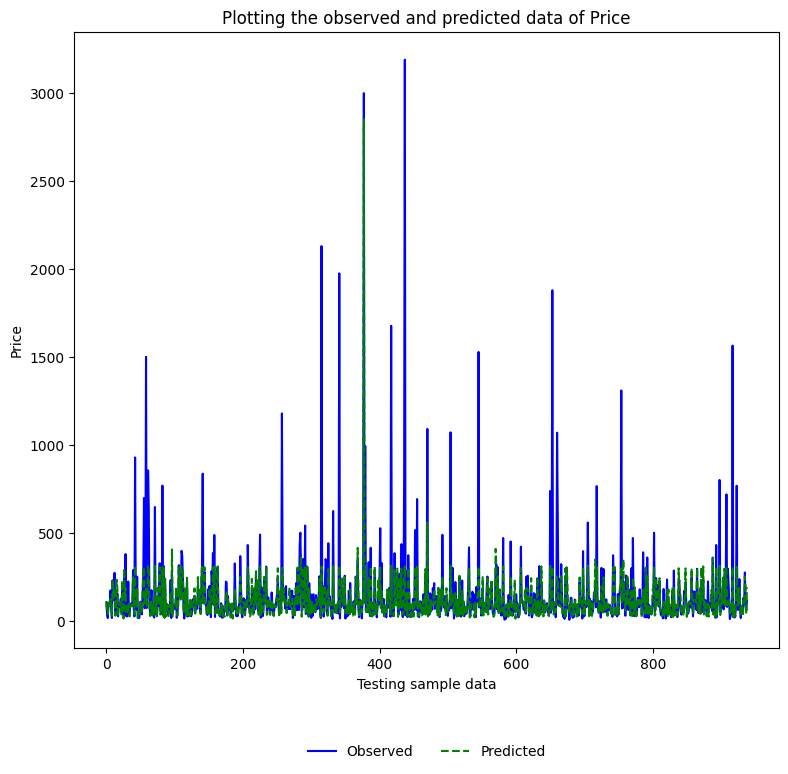

In [93]:
import matplotlib.pyplot as plt    
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
x_axis=range(len(X_test))
plt.plot(x_axis,y_test,label='Observed',color='blue',linestyle='-')
plt.plot(x_axis,y_test_pred,label='Predicted',color='green',linestyle='--')
plt.xlabel('Testing sample data')
plt.ylabel('Price')
plt.title('Plotting the observed and predicted data of Price',color='black')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


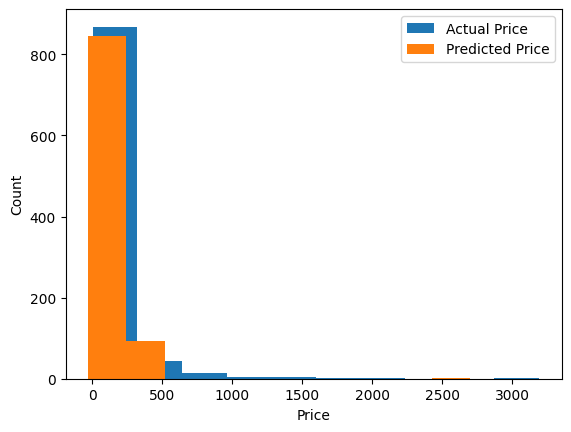

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

# Create LinearSVR model
regressor = LinearSVR(C=1)

# SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#     class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the Price for the test data
y_pred = regressor.predict(X_test)

# Create a DataFrame for plotting
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plot the Actual Price and Predicted Price
plt.hist(results['Actual Price'], label='Actual Price', alpha=1)
plt.hist(results['Predicted Price'], label='Predicted Price', alpha=1)
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

## Model Evaluation

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


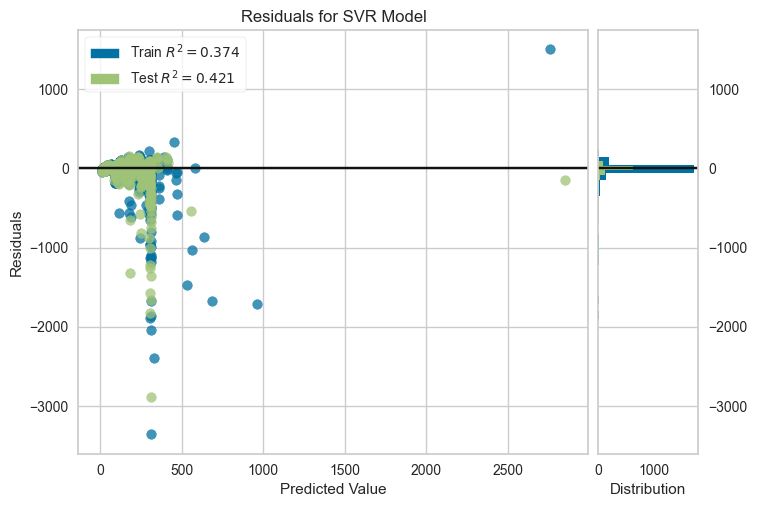

In [96]:
#The residuals plot
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(svr_lin)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

In [44]:
from sklearn.model_selection import cross_val_score,GridSearchCV 

In [ ]:
cross_val=cross_val_score(svr_lin,X,y,cv=10)
print('10 fold Cross validation:\n\n',cross_val)
print('\n\nMean of 10 fold Cross validation is : {:.6f}'.format(cross_val.mean()))

In [46]:
import warnings
warnings.filterwarnings('ignore')
parameters=[{'C':[1,10],'kernel':['linear']},
           {'C':[1,10],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5]},
           {'C':[1,10],'kernel':['poly'],'degree':[2,3,4],'gamma':[0.01,0.02,0.03,0.04,0.05]}]
svr=SVR()
grid_search=GridSearchCV(estimator=svr,scoring='accuracy',param_grid=parameters,cv=5,verbose=0)
grid_search.fit(X_train,y_train)

print('GridSearch CV best score:{:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best result:','\n\n',(grid_search.best_params_))
print('\nEstimator that was chosen by the search:',grid_search.best_estimator_)

In [116]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

X = df_target.drop('Price', axis=1)
y = df_target['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_score(regressors, X_train, y_train, X_test, y_test):
    for i, regressor in enumerate(regressors):
        if i == 0:
            print("Train Result:\n================================================")
        else:
            print("\nTest Result:\n================================================")
        
        regressor.fit(X_train, y_train)
        
        y_train_pred = regressor.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        
        print(f"Model {i+1}:")
        print(f"Mean Squared Error (Train): {mse_train:.2f}")
        print(f"R-squared (Train): {r2_train:.2f}")
        
        y_test_pred = regressor.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        print(f"Mean Squared Error (Test): {mse_test:.2f}")
        print(f"R-squared (Test): {r2_test:.2f}")
        print("_______________________________________________")

# Create Linear Support Vector Regression models with different parameters
C_values = [0.1, 0.5, 1.0]
epsilon_values = [0.1, 0.2, 0.5]
regressors = [LinearSVR(C=C, epsilon=epsilon) for C in C_values for epsilon in epsilon_values]

# `SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
#      verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Evaluate and print the scores for all models
print_score(regressors, X_train, y_train, X_test, y_test)

Train Result:
Model 1:
Mean Squared Error (Train): 31895.34
R-squared (Train): 0.35
Mean Squared Error (Test): 36127.21
R-squared (Test): 0.40
_______________________________________________

Test Result:


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model 2:
Mean Squared Error (Train): 31738.38
R-squared (Train): 0.35
Mean Squared Error (Test): 35921.46
R-squared (Test): 0.41
_______________________________________________

Test Result:
Model 3:
Mean Squared Error (Train): 31726.89
R-squared (Train): 0.35
Mean Squared Error (Test): 35913.81
R-squared (Test): 0.41
_______________________________________________

Test Result:


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model 4:
Mean Squared Error (Train): 30757.32
R-squared (Train): 0.37
Mean Squared Error (Test): 34930.03
R-squared (Test): 0.42
_______________________________________________

Test Result:
Model 5:
Mean Squared Error (Train): 31924.62
R-squared (Train): 0.35
Mean Squared Error (Test): 36266.57
R-squared (Test): 0.40
_______________________________________________

Test Result:


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model 6:
Mean Squared Error (Train): 30717.31
R-squared (Train): 0.38
Mean Squared Error (Test): 34826.15
R-squared (Test): 0.43
_______________________________________________

Test Result:
Model 7:
Mean Squared Error (Train): 30497.21
R-squared (Train): 0.38
Mean Squared Error (Test): 34653.59
R-squared (Test): 0.43
_______________________________________________

Test Result:


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model 8:
Mean Squared Error (Train): 30163.18
R-squared (Train): 0.39
Mean Squared Error (Test): 34343.19
R-squared (Test): 0.43
_______________________________________________

Test Result:
Model 9:
Mean Squared Error (Train): 29974.38
R-squared (Train): 0.39
Mean Squared Error (Test): 34220.92
R-squared (Test): 0.44
_______________________________________________


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


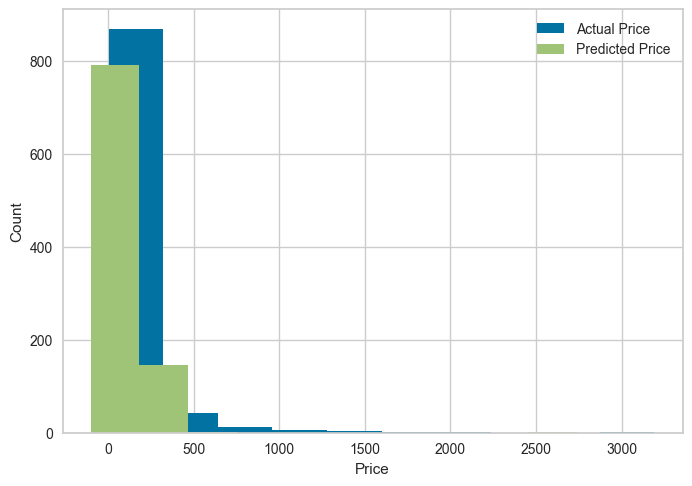

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

# Create LinearSVR model
regressor = LinearSVR(C=1)

# SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#     class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the Price for the test data
y_pred = regressor.predict(X_test)

# Create a DataFrame for plotting
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plot the Actual Price and Predicted Price
plt.hist(results['Actual Price'], label='Actual Price', alpha=1)
plt.hist(results['Predicted Price'], label='Predicted Price', alpha=1)
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                  Feature  Importance Score
7  Transportation_Quality         68.152642
6              Group_Size         22.686044
9            Tour_Quality          6.312969
8                    Food          5.987546
5         Tour_Popularity          5.620287
2                  Rating          4.388381
3                Duration          2.133720
1      Number_of_Reviewer          0.123025
0               Tour_Type          0.088277
4                Location          0.025760


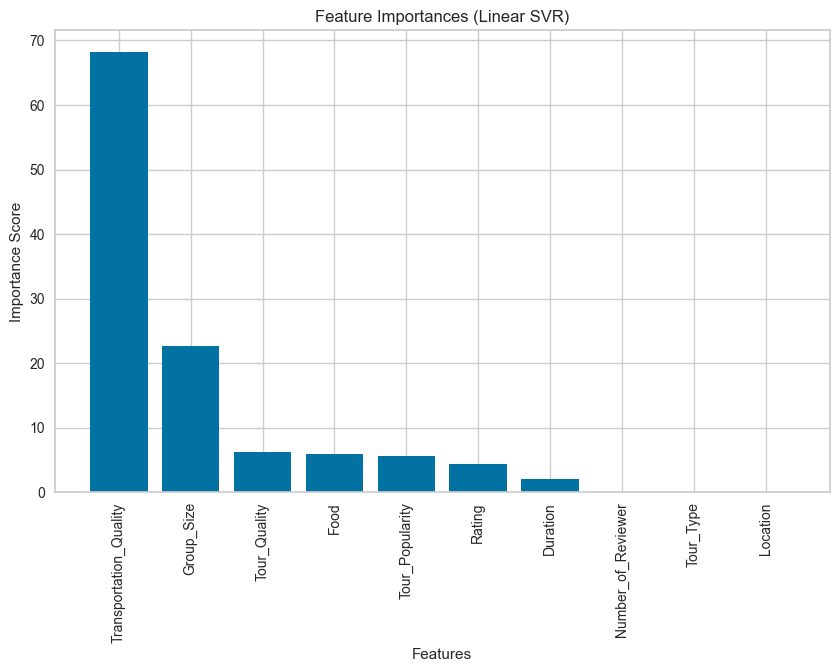

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X, y, X_train, X_test, y_train, y_test from previous code

# Create Linear SVR model
svr = LinearSVR()

# Fit the model on the training data
svr.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = svr.coef_

# Create a DataFrame to store feature importances and their scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance Score': np.abs(feature_importances)})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)

# Print the DataFrame with feature importances and scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance Score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances (Linear SVR)')
plt.show()